In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sqlite3
#from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sma
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,cohen_kappa_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.tree import plot_tree 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,classification_report,roc_auc_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.decomposition import PCA

from sklearn.cluster import DBSCAN,KMeans
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer

from sklearn.metrics import silhouette_score
from mlxtend.feature_selection import SequentialFeatureSelector


In [2]:
df=pd.read_csv("kPMogd.csv",na_filter="?")
df.head(2)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Expense
0,39,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,50,United-States,>50K
1,20,Private,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,40,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             5000 non-null   int64 
 1   workclass       5000 non-null   object
 2   education       5000 non-null   object
 3   education-num   5000 non-null   int64 
 4   marital-status  5000 non-null   object
 5   occupation      5000 non-null   object
 6   relationship    5000 non-null   object
 7   race            5000 non-null   object
 8   sex             5000 non-null   object
 9   capital-gain    5000 non-null   int64 
 10  capital-loss    5000 non-null   int64 
 11  hours-per-week  5000 non-null   int64 
 12  native-country  5000 non-null   object
 13  Expense         5000 non-null   object
dtypes: int64(5), object(9)
memory usage: 547.0+ KB


In [4]:
df["education-num"].value_counts()

9     1602
10    1142
13     823
14     259
11     214
7      179
12     157
6      156
4      105
15      90
5       84
8       57
16      56
3       46
2       25
1        5
Name: education-num, dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.0,38.6560,13.698292,17.0,28.0,37.0,48.0,90.0
education-num,5000.0,10.0650,2.558141,1.0,9.0,10.0,12.0,16.0
capital-gain,5000.0,1104.0800,7579.674371,0.0,0.0,0.0,0.0,99999.0
capital-loss,5000.0,90.0328,404.168991,0.0,0.0,0.0,0.0,3004.0
hours-per-week,5000.0,40.5662,12.154191,1.0,40.0,40.0,45.0,99.0


In [6]:

import matplotlib.pyplot as plt
import seaborn as sns

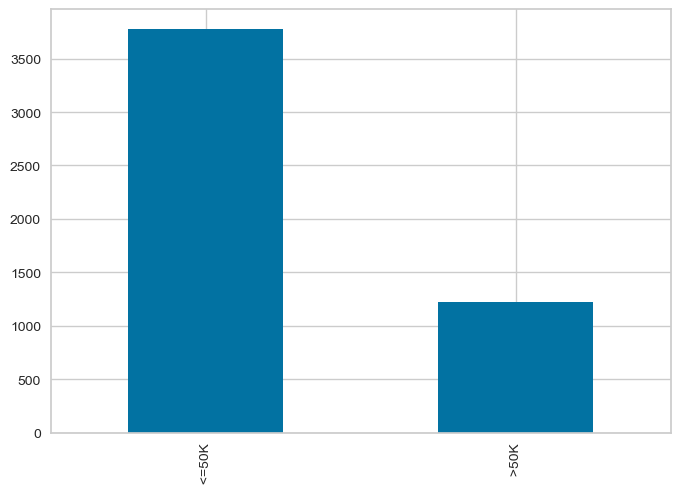

In [7]:
df["Expense"].value_counts().plot(kind="bar")
plt.show()

In [8]:
df["workclass"].value_counts()

 Private             3444
 Self-emp-not-inc     385
 ?                    320
 Local-gov            318
 State-gov            199
 Self-emp-inc         184
 Federal-gov          148
 Without-pay            1
 Never-worked           1
Name: workclass, dtype: int64

In [9]:
df.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Expense           0
dtype: int64

In [10]:
df.shape

(5000, 14)

In [11]:
plt.rcParams["figure.figsize"]=[15,8]

In [12]:
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Expense
0,39,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,50,United-States,>50K
1,20,Private,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,40,United-States,<=50K
2,50,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,65,United-States,>50K
3,38,State-gov,HS-grad,9,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,>50K
4,23,Local-gov,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Female,0,0,60,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,38,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
4996,26,Private,Some-college,10,Never-married,Tech-support,Own-child,White,Female,0,0,40,United-States,<=50K
4997,20,Private,11th,7,Never-married,Transport-moving,Own-child,White,Male,0,0,60,United-States,<=50K
4998,24,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,Mexico,>50K


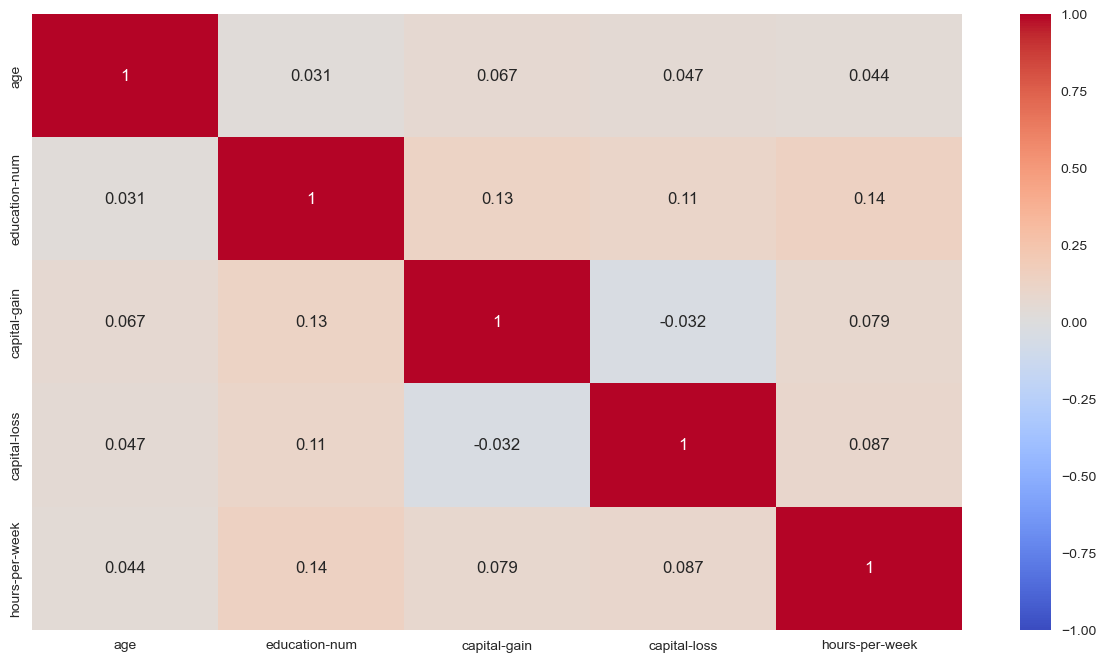

In [13]:
sns.heatmap(df.corr(),annot=True,vmax=1,vmin=-1,cmap="coolwarm")
plt.show()

In [14]:
cols=list(df.select_dtypes(include="object").columns)

for i in cols:
    print("\n",df[i].value_counts())


  Private             3444
 Self-emp-not-inc     385
 ?                    320
 Local-gov            318
 State-gov            199
 Self-emp-inc         184
 Federal-gov          148
 Without-pay            1
 Never-worked           1
Name: workclass, dtype: int64

  HS-grad         1602
 Some-college    1142
 Bachelors        823
 Masters          259
 Assoc-voc        214
 11th             179
 Assoc-acdm       157
 10th             156
 7th-8th          105
 Prof-school       90
 9th               84
 12th              57
 Doctorate         56
 5th-6th           46
 1st-4th           25
 Preschool          5
Name: education, dtype: int64

  Married-civ-spouse       2294
 Never-married            1643
 Divorced                  683
 Separated                 159
 Widowed                   150
 Married-spouse-absent      67
 Married-AF-spouse           4
Name: marital-status, dtype: int64

  Craft-repair         630
 Prof-specialty       619
 Exec-managerial      609
 Sales          

In [15]:
df.isnull().sum().sum()

0

In [16]:
df.std()

age                 13.698292
education-num        2.558141
capital-gain      7579.674371
capital-loss       404.168991
hours-per-week      12.154191
dtype: float64

In [17]:
df[df==" ?"]=np.nan

In [18]:
(df.isnull().sum()/(df.index.size)*100).sort_values(ascending=False)

occupation        6.42
workclass         6.40
native-country    1.96
age               0.00
education         0.00
education-num     0.00
marital-status    0.00
relationship      0.00
race              0.00
sex               0.00
capital-gain      0.00
capital-loss      0.00
hours-per-week    0.00
Expense           0.00
dtype: float64

In [19]:
objects=df.select_dtypes(include="object").columns

In [20]:
num_cols=df.select_dtypes(include=np.number)
cat_cols=df.select_dtypes(include="object")

In [21]:
num_cols.shape

(5000, 5)

In [22]:
cat_cols.shape

(5000, 9)

In [23]:
%matplotlib inline

In [24]:
num_cols


,age,education-num,capital-gain,capital-loss,hours-per-week
0,39,13,15024,0,50
1,20,10,0,0,40
2,50,16,0,1902,65
3,38,9,0,0,40
4,23,13,0,0,60
...,...,...,...,...,...
4995,38,9,0,0,40
4996,26,10,0,0,40
4997,20,7,0,0,60
4998,24,9,0,0,60


### univeriate
* checking the distribution of the numerical columns

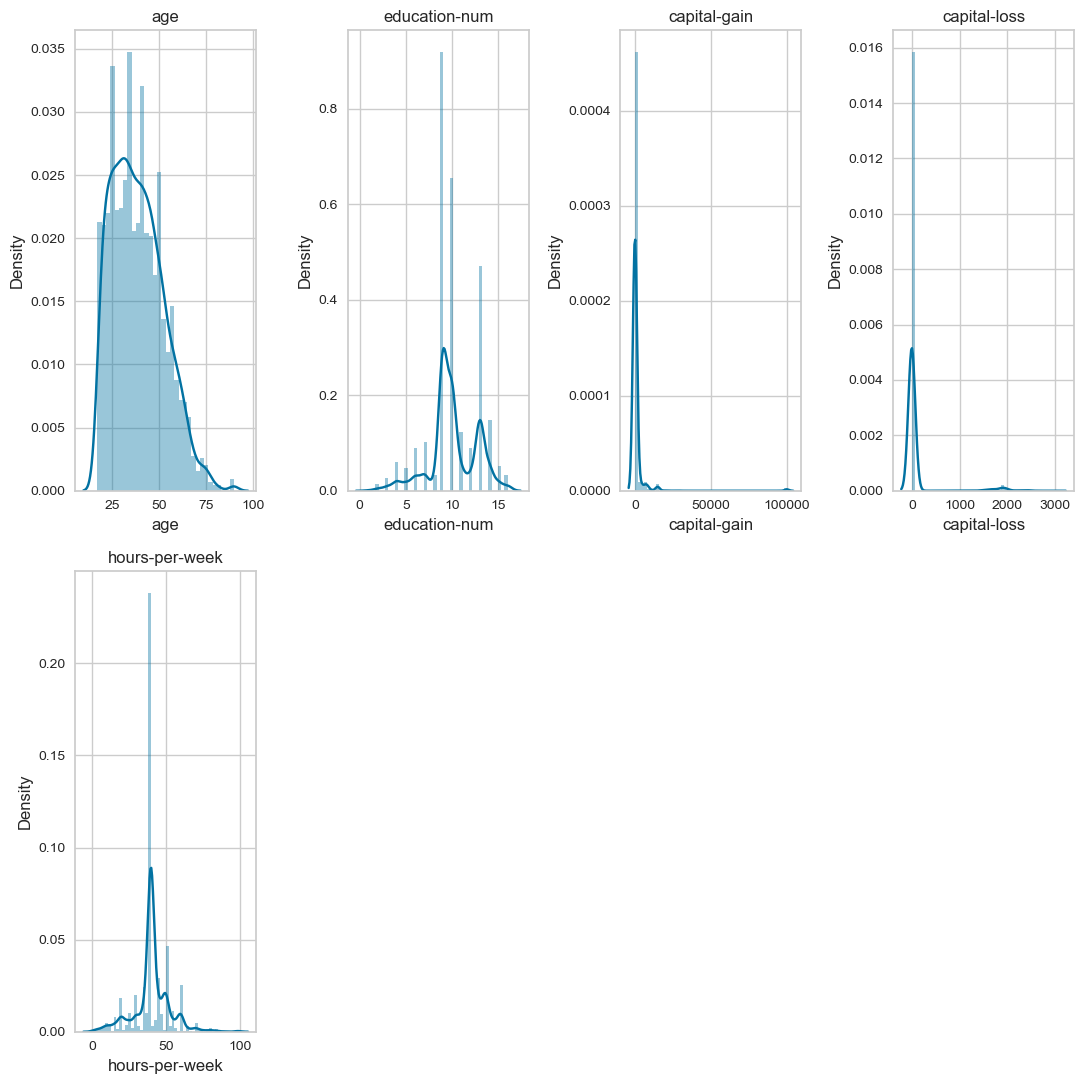

In [25]:
# checking the distribution of the numerical columns
# univeriate
t=1
plt.figure(figsize=(11,11))
for i in num_cols:
    plt.subplot(2,4,t)
    sns.distplot(num_cols[i])
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

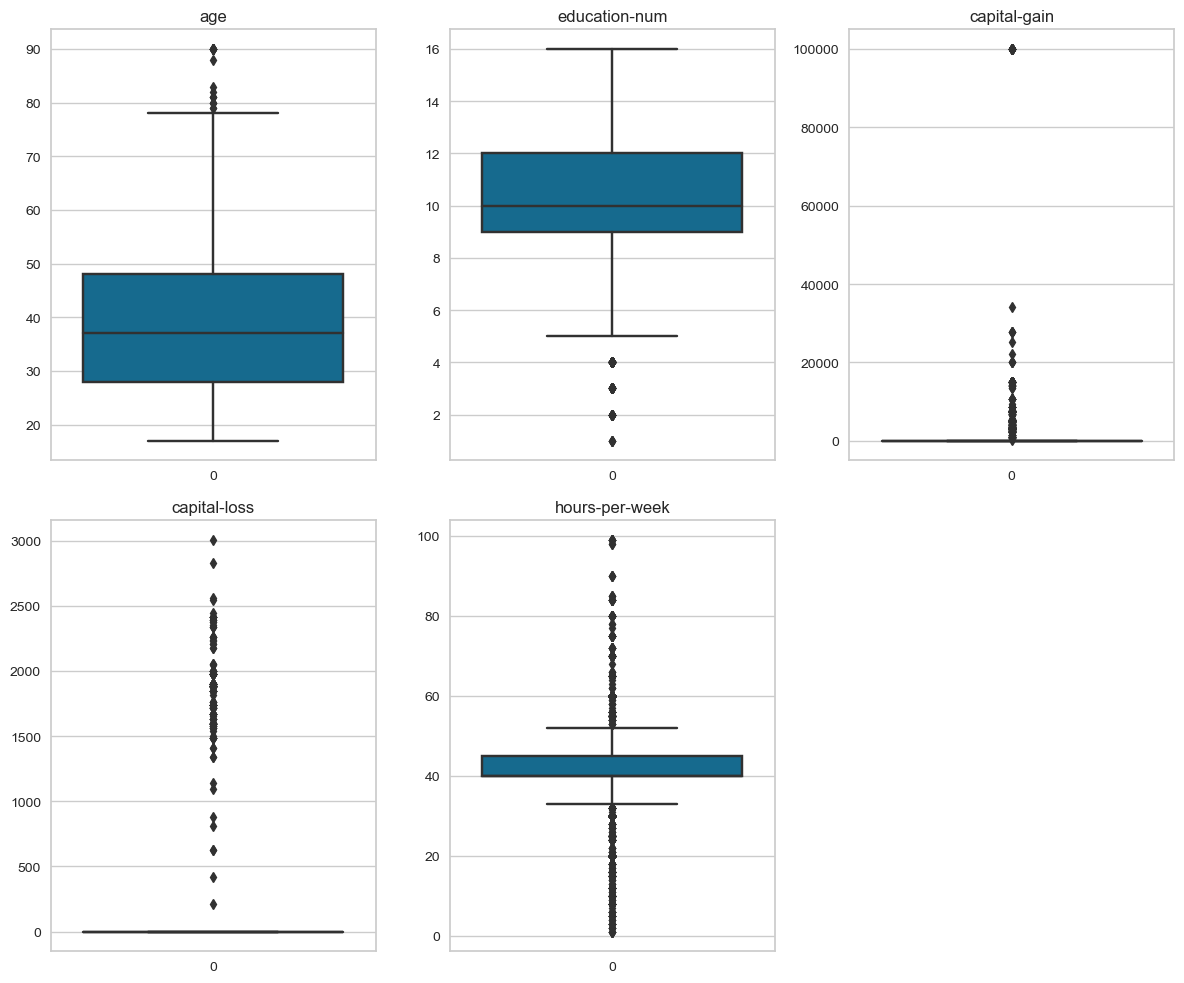

In [26]:
t=1
plt.figure(figsize=(12,10))
for i in num_cols:
    plt.subplot(2,3,t)
    sns.boxplot(df[i])
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

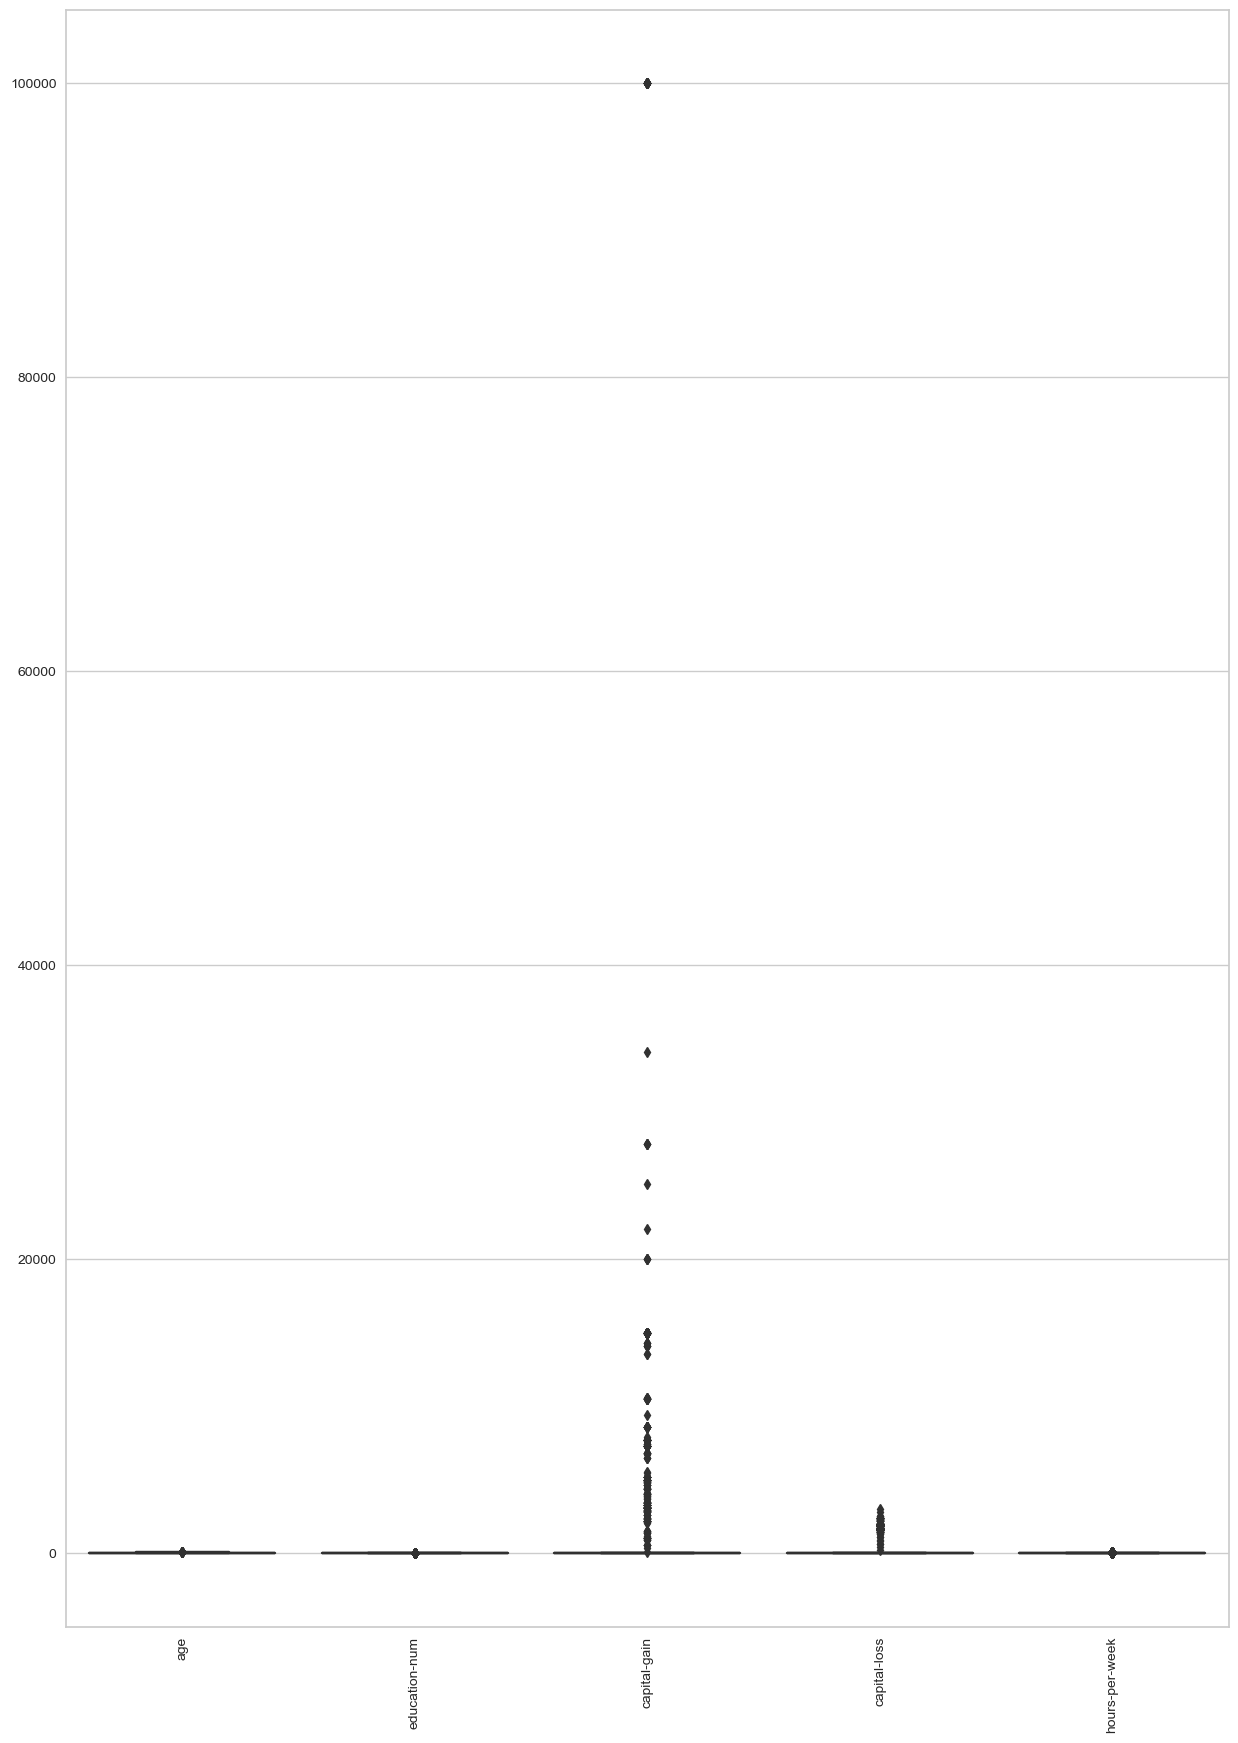

In [27]:
plt.figure(figsize=(15,21))
sns.boxplot(df.select_dtypes(include=np.number))
plt.xticks(rotation=90)
plt.show()

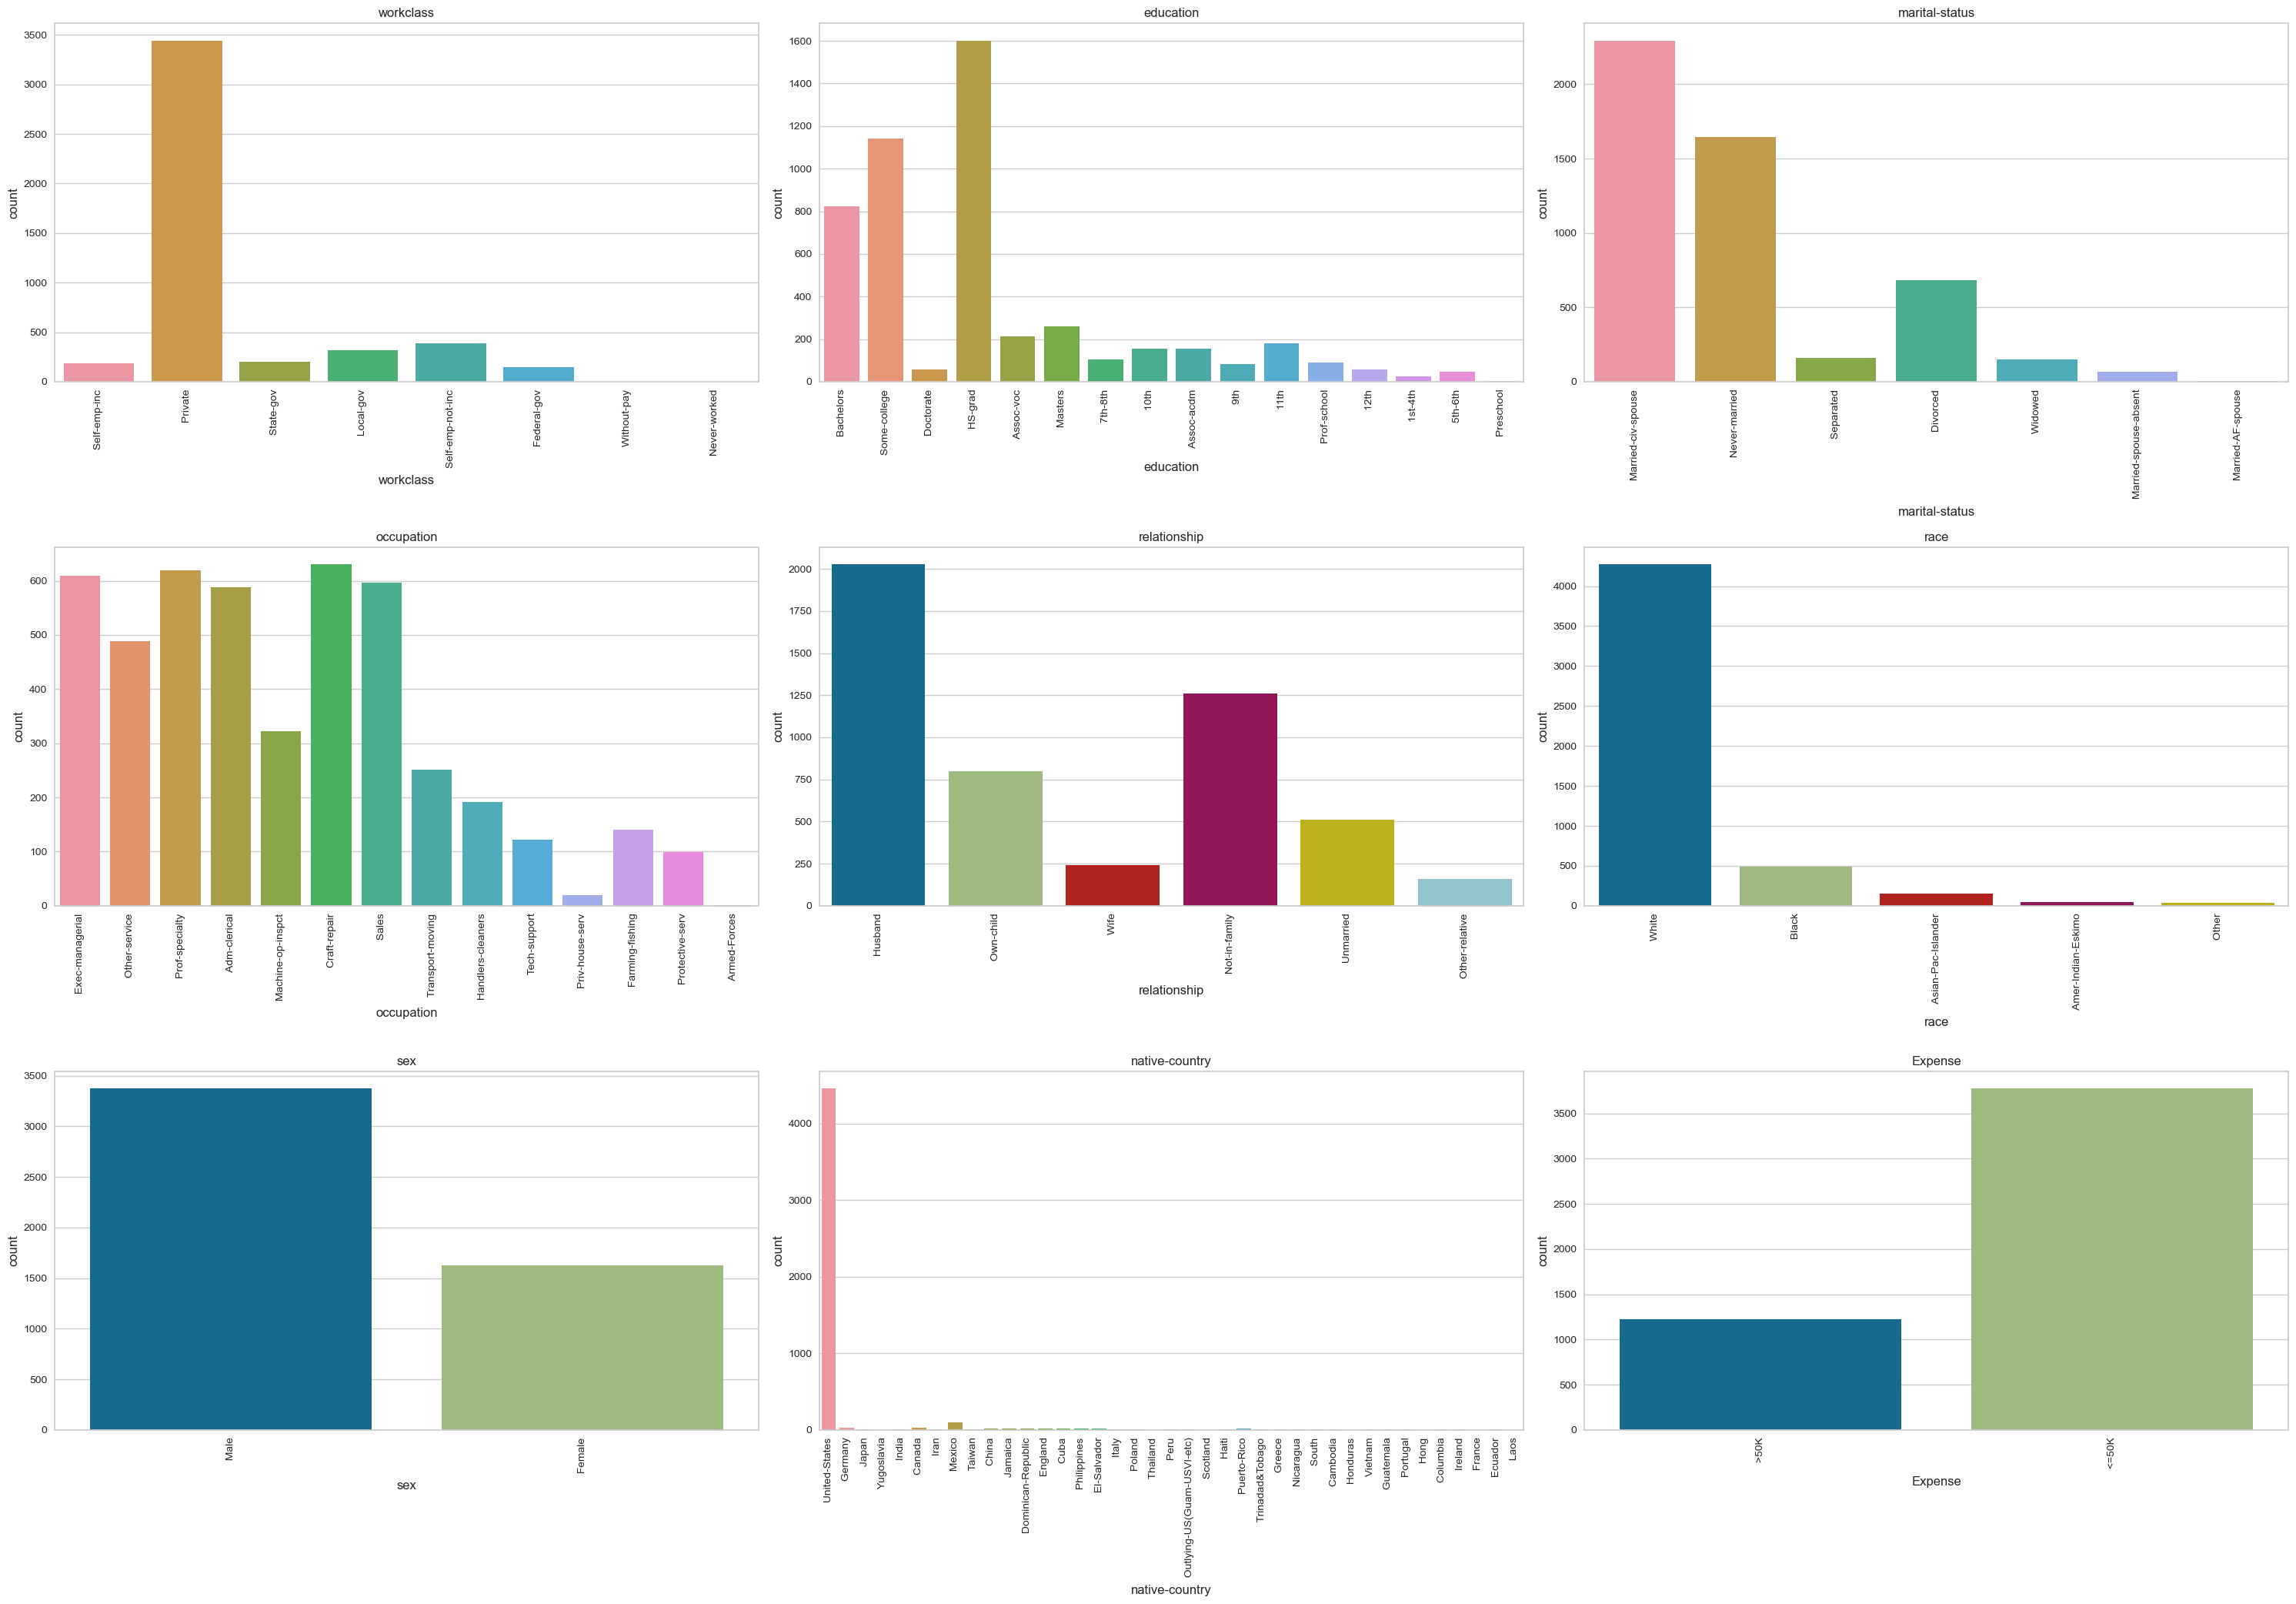

In [28]:
# checking the value and distribution of the categorical columns
# cat

t=1
plt.figure(figsize=(30,21))
for i in cat_cols:
    plt.subplot(3,3,t)
    sns.countplot(data=df,x=df[i])
    plt.title(i)
    t+=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Bivariate

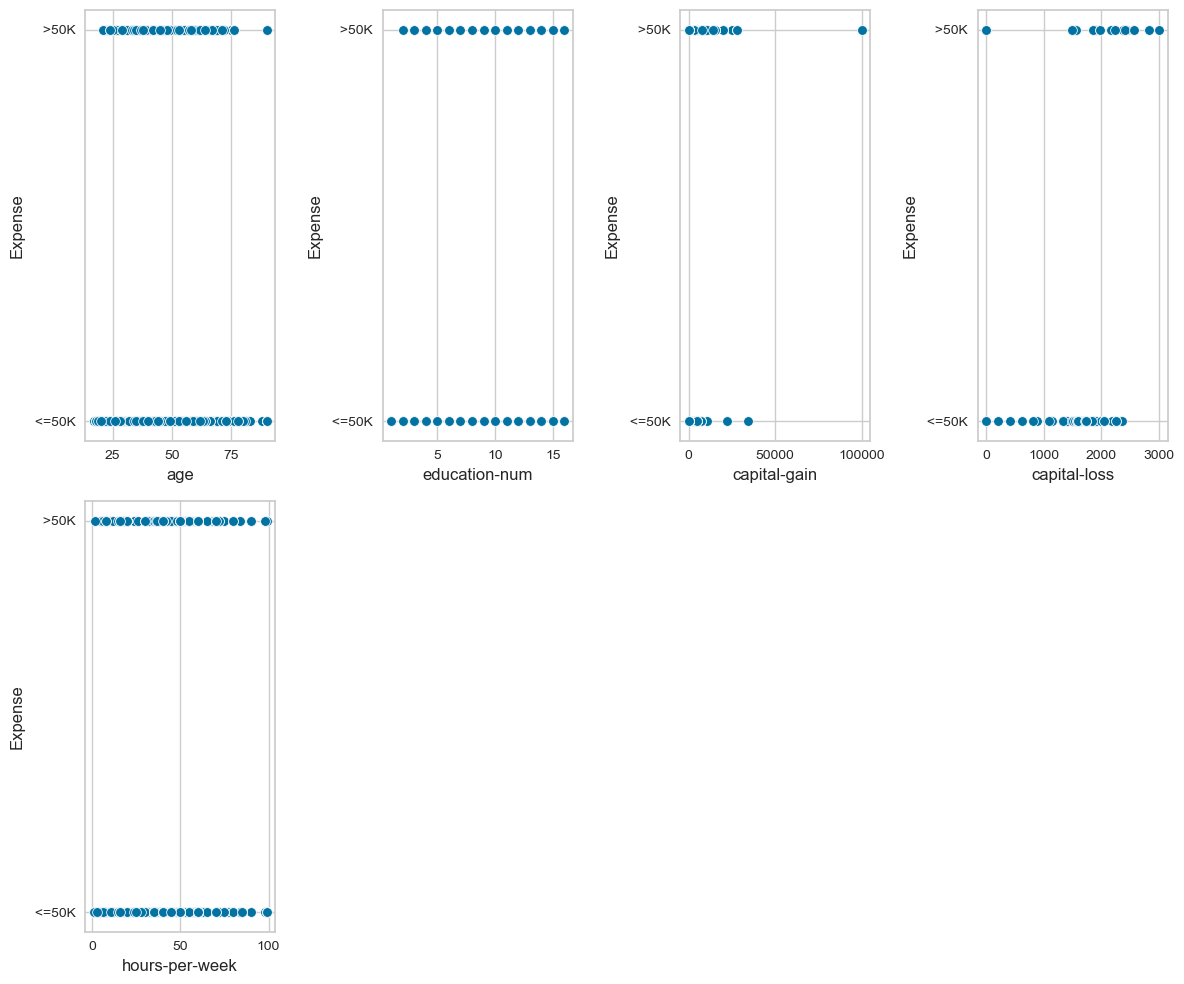

In [29]:
# Num vs num
t=1
plt.figure(figsize=(12,10))
for i in num_cols:
    plt.subplot(2,4,t)
    sns.scatterplot(data=df,x=df.loc[:,i],y=df['Expense'])
    t+=1
plt.tight_layout()
plt.show()

* No linearity in the data

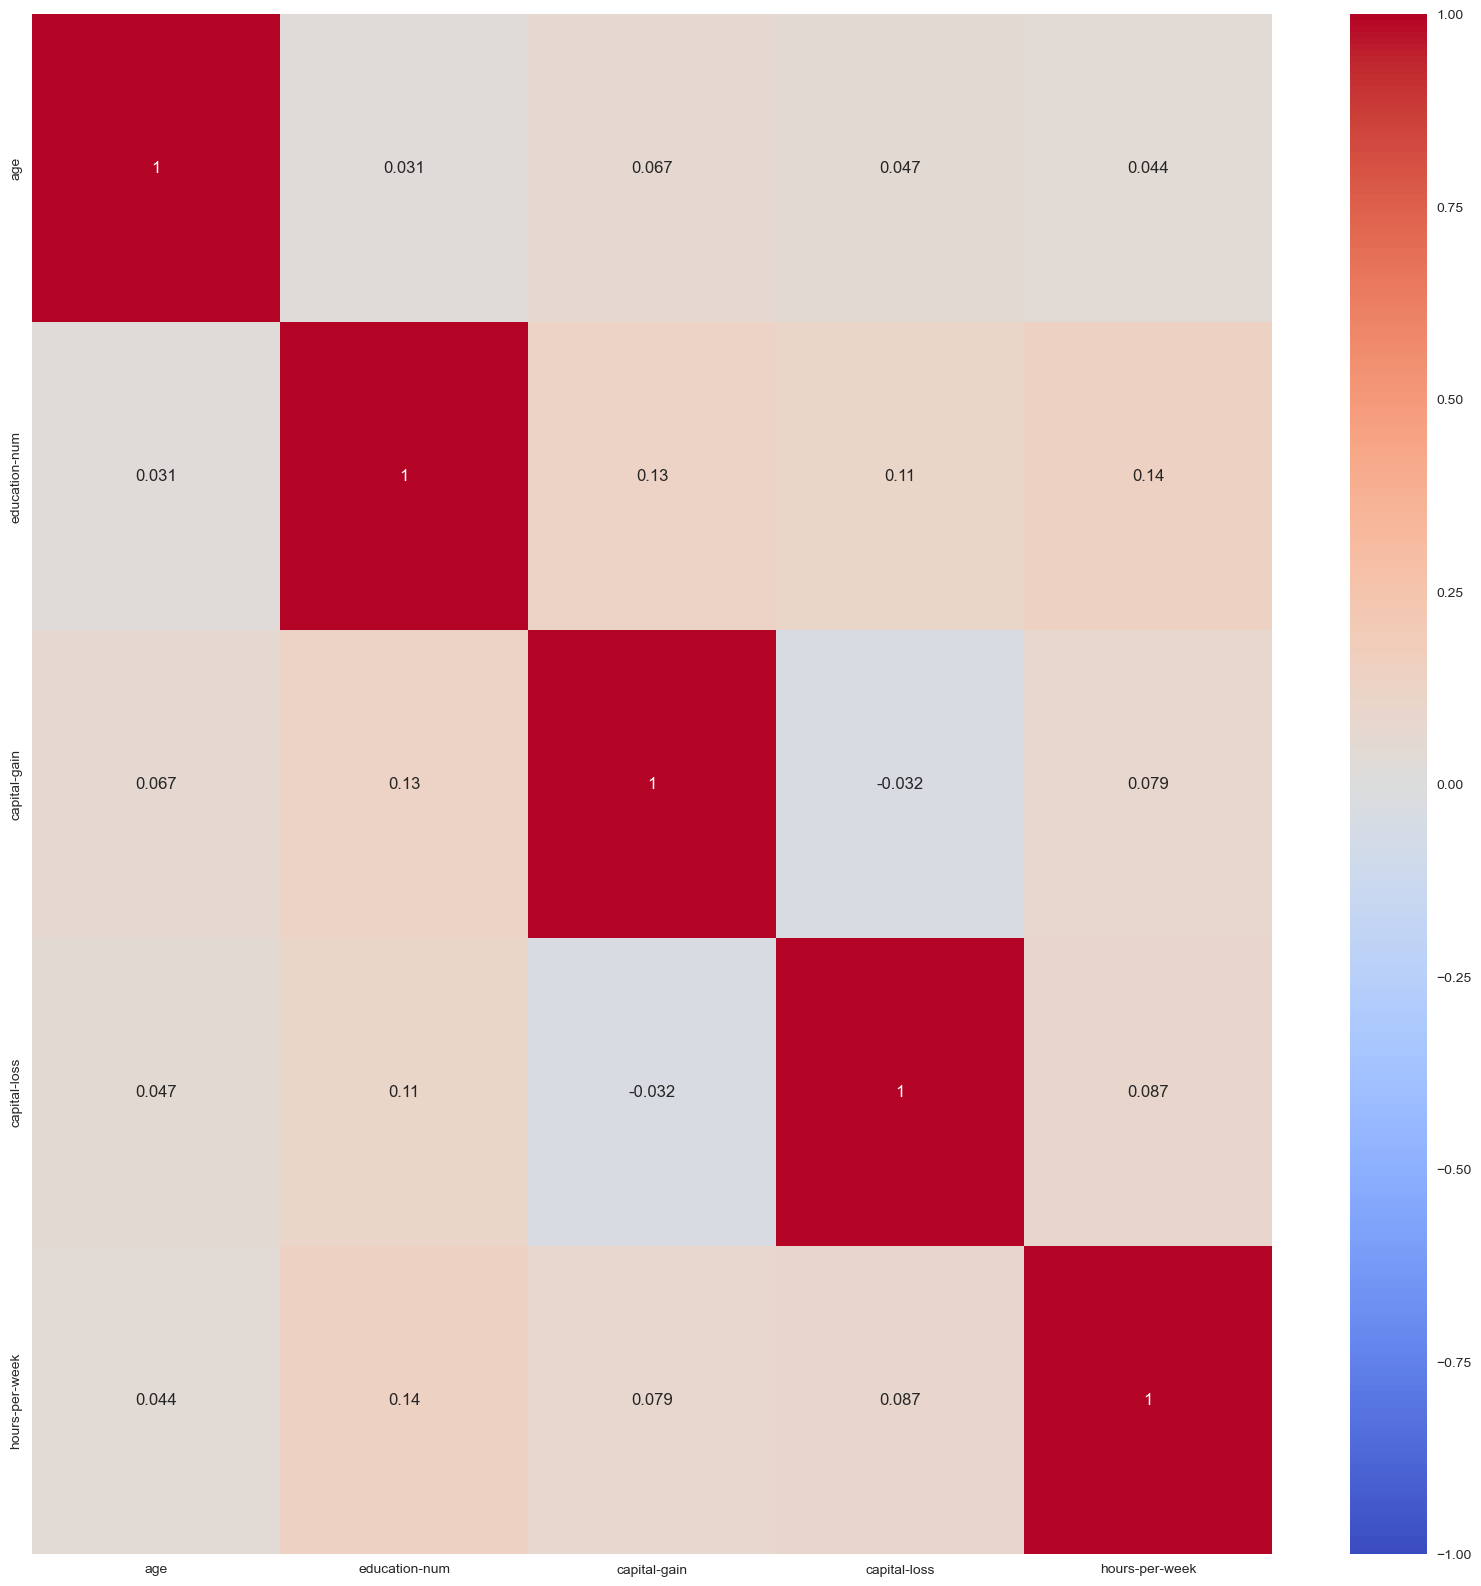

In [30]:
plt.figure(figsize=(20,20))
sns.heatmap(num_cols.corr(),annot=True,vmin=-1,vmax=1,cmap="coolwarm")
plt.show()

#### some features which have extreme values are:-
* capital loss and capital have some exterme values

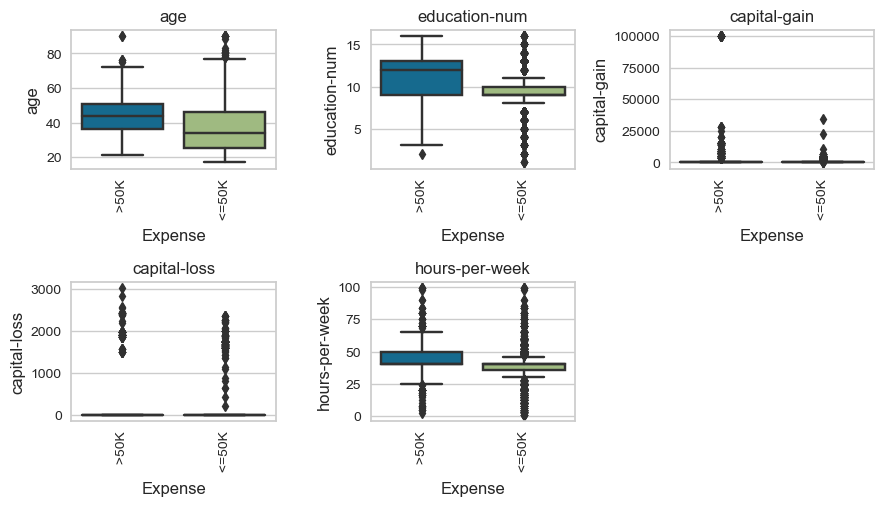

In [31]:
#  cat vs num

t=1
plt.figure(figsize=(9,7))
for i in num_cols:
    plt.subplot(3,3,t)
    sns.boxplot(data=df,y=df.loc[:,i],x=df['Expense'])
    plt.title(i)
    t+=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

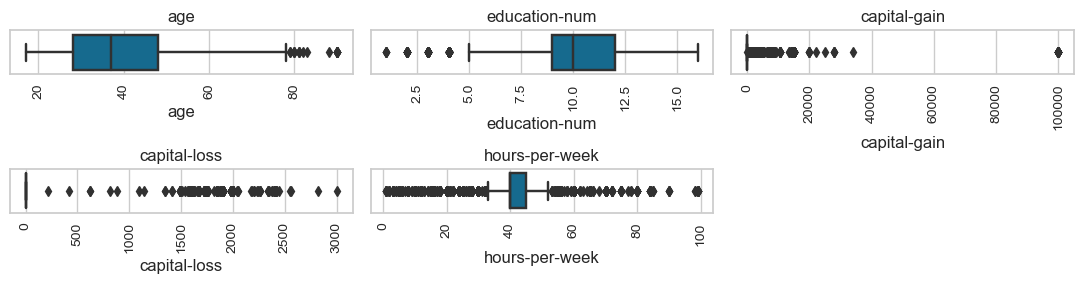

In [32]:
 # checking outliers 
t=1
plt.figure(figsize=(11,3))
for i in num_cols:
    plt.subplot(2,3,t)
    sns.boxplot(x=df[i],orient="h")
    plt.title(i)
    t+=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [33]:
cat_cols

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,Expense
0,Self-emp-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
1,Private,Some-college,Never-married,Other-service,Own-child,White,Male,United-States,<=50K
2,Private,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,>50K
3,State-gov,HS-grad,Married-civ-spouse,Prof-specialty,Wife,White,Female,United-States,>50K
4,Local-gov,Bachelors,Never-married,Prof-specialty,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
4995,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,<=50K
4996,Private,Some-college,Never-married,Tech-support,Own-child,White,Female,United-States,<=50K
4997,Private,11th,Never-married,Transport-moving,Own-child,White,Male,United-States,<=50K
4998,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,Mexico,>50K


In [34]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(missing_values=np.nan,strategy="most_frequent")

# fit all  the valuse

imputer=imputer.fit(df[objects].iloc[:,:])

df[objects]=imputer.fit_transform(df[objects])

In [35]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             5000 non-null   int64 
 1   workclass       5000 non-null   object
 2   education       5000 non-null   object
 3   education-num   5000 non-null   int64 
 4   marital-status  5000 non-null   object
 5   occupation      5000 non-null   object
 6   relationship    5000 non-null   object
 7   race            5000 non-null   object
 8   sex             5000 non-null   object
 9   capital-gain    5000 non-null   int64 
 10  capital-loss    5000 non-null   int64 
 11  hours-per-week  5000 non-null   int64 
 12  native-country  5000 non-null   object
 13  Expense         5000 non-null   object
dtypes: int64(5), object(9)
memory usage: 547.0+ KB


In [36]:
num_cols.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

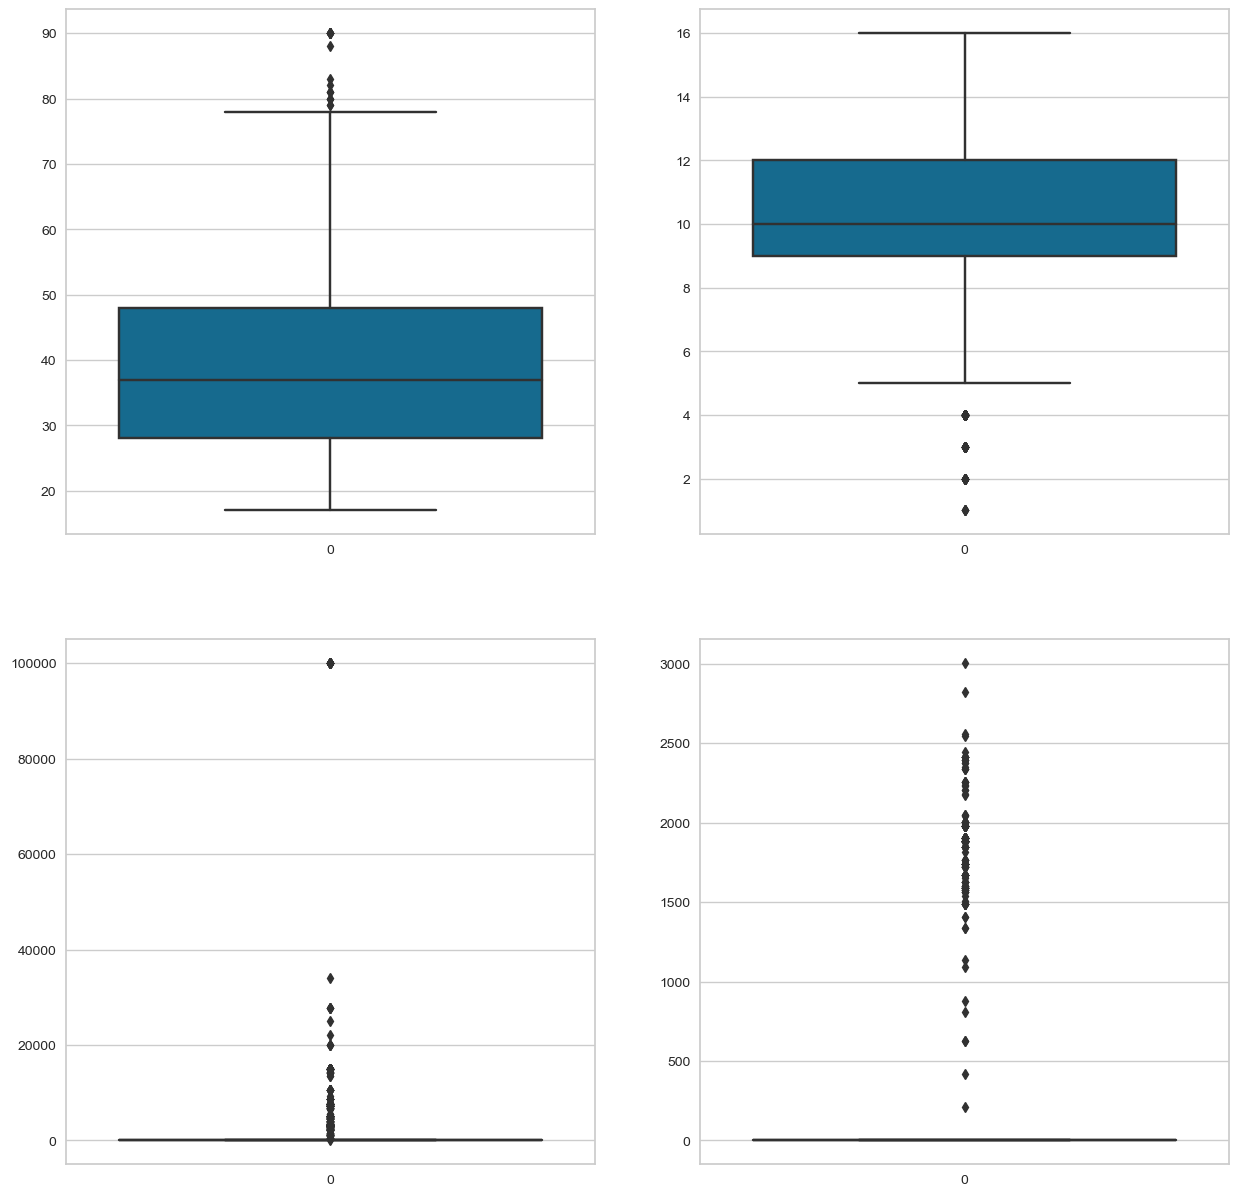

In [37]:
fig, ax=plt.subplots(2,2,figsize=(15,15))
for var, subplot in zip(num_cols.columns,ax.flatten()):
    sns.boxplot(num_cols[var],ax=subplot)
plt.show()

In [38]:
df["Expense"].unique()

array([' >50K', ' <=50K'], dtype=object)

In [39]:
df["Expense"]=df["Expense"].map({' >50K':0, ' <=50K':1})

In [40]:
df["Expense"].value_counts(normalize=True)*100

1    75.52
0    24.48
Name: Expense, dtype: float64

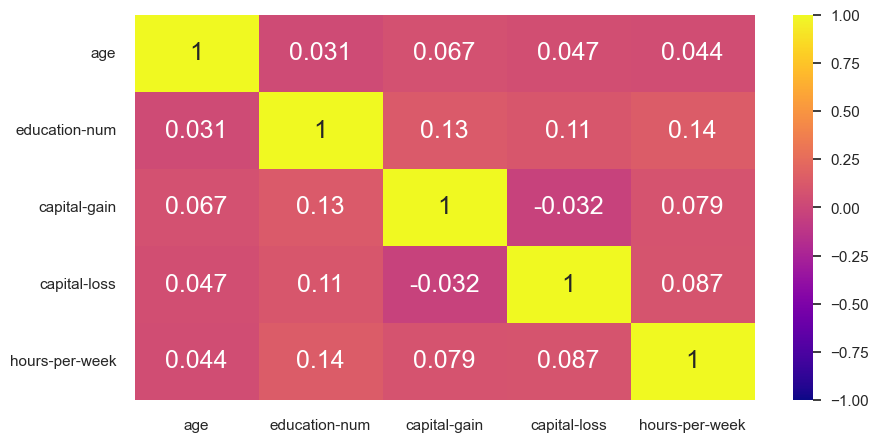

In [41]:
plt.figure(figsize=(10,5))
sns.set(font_scale=1)
sns.heatmap(num_cols.corr(),
            cmap='plasma',
            vmax=1.0,
            vmin=-1.0,
            annot = True,
            annot_kws={"size": 18})
plt.show()

In [42]:
import category_encoders as ce


In [43]:
cols=df["workclass"]
cols

0        Self-emp-inc
1             Private
2             Private
3           State-gov
4           Local-gov
            ...      
4995          Private
4996          Private
4997          Private
4998          Private
4999          Private
Name: workclass, Length: 5000, dtype: object

In [44]:
cat_cols

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,Expense
0,Self-emp-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
1,Private,Some-college,Never-married,Other-service,Own-child,White,Male,United-States,<=50K
2,Private,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,>50K
3,State-gov,HS-grad,Married-civ-spouse,Prof-specialty,Wife,White,Female,United-States,>50K
4,Local-gov,Bachelors,Never-married,Prof-specialty,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
4995,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,<=50K
4996,Private,Some-college,Never-married,Tech-support,Own-child,White,Female,United-States,<=50K
4997,Private,11th,Never-married,Transport-moving,Own-child,White,Male,United-States,<=50K
4998,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,Mexico,>50K


In [45]:
from sklearn.preprocessing import LabelEncoder


In [46]:
le = LabelEncoder()
for i in cat_cols:
    df[i] = le.fit_transform(df[i])

In [47]:
q3=num_cols.quantile(0.75)
q1=num_cols.quantile(0.25)

iqr=q3-q1
upper=q3+1.5*iqr
lower=q1-1.5*iqr
#outliers = df.select_dtypes(include =np.number)[(df.select_dtypes(include =np.number) >= lower) & (df.select_dtypes(include =np.number)<= upper)]
outliers_mask = (num_cols < lower) | (num_cols > upper)

# Remove rows with outliers
df[~outliers_mask.any(axis=1)]

# Display the resulting DataFrame without outliers
df.head(1)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Expense
0,39,4,9,13,2,3,0,4,1,15024,0,50,36,0


In [48]:
scaler = StandardScaler()
for i in num_cols:
    df[i] = scaler.fit_transform(num_cols)

# Create a new DataFrame with the scaled data
#df_scaled = pd.DataFrame(scaled_data, columns=df_no_outliers_filled.columns)
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Expense
0,0.025115,4,9,0.025115,2,3,0,4,1,0.025115,0.025115,0.025115,36,0
1,-1.362058,3,15,-1.362058,4,7,3,4,1,-1.362058,-1.362058,-1.362058,36,1
2,0.828215,3,10,0.828215,2,9,0,4,1,0.828215,0.828215,0.828215,36,0
3,-0.047894,6,11,-0.047894,2,9,5,4,0,-0.047894,-0.047894,-0.047894,36,0
4,-1.143031,1,9,-1.143031,4,9,3,4,0,-1.143031,-1.143031,-1.143031,36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.047894,3,11,-0.047894,2,6,0,4,1,-0.047894,-0.047894,-0.047894,36,1
4996,-0.924003,3,15,-0.924003,4,12,3,4,0,-0.924003,-0.924003,-0.924003,36,1
4997,-1.362058,3,1,-1.362058,4,13,3,4,1,-1.362058,-1.362058,-1.362058,36,1
4998,-1.070021,3,11,-1.070021,2,2,0,4,1,-1.070021,-1.070021,-1.070021,23,0


In [49]:
target_column=df["Expense"]

In [50]:
from scipy.stats import chi2_contingency
# Assuming df_cat is your categorical variable and df_target is your target variable
dependent_variables = []
independent_variables = []

for i in cat_cols:
    contingency_table = pd.crosstab(cat_cols[i],target_column)

# Perform Chi-Square Test of Independence
    chi2, p, dof, expected = chi2_contingency(contingency_table.values)
 # Check if p-value is less than 0.05
    if p < 0.05:
        dependent_variables.append(([i],p))
    else:
        independent_variables.append(([i],p))

# Print the results
print("Dependent Variables:\n", dependent_variables)

print("\nIndependent Variables:", independent_variables)

Dependent Variables:
 [(['workclass'], 1.1804565727206371e-27), (['education'], 4.550765028152507e-124), (['marital-status'], 2.3872499341224178e-229), (['occupation'], 1.341215697726766e-110), (['relationship'], 1.973454295428794e-234), (['race'], 1.516235332692332e-10), (['sex'], 6.767124964878986e-46), (['native-country'], 0.003868715016964795), (['Expense'], 0.0)]

Independent Variables: []


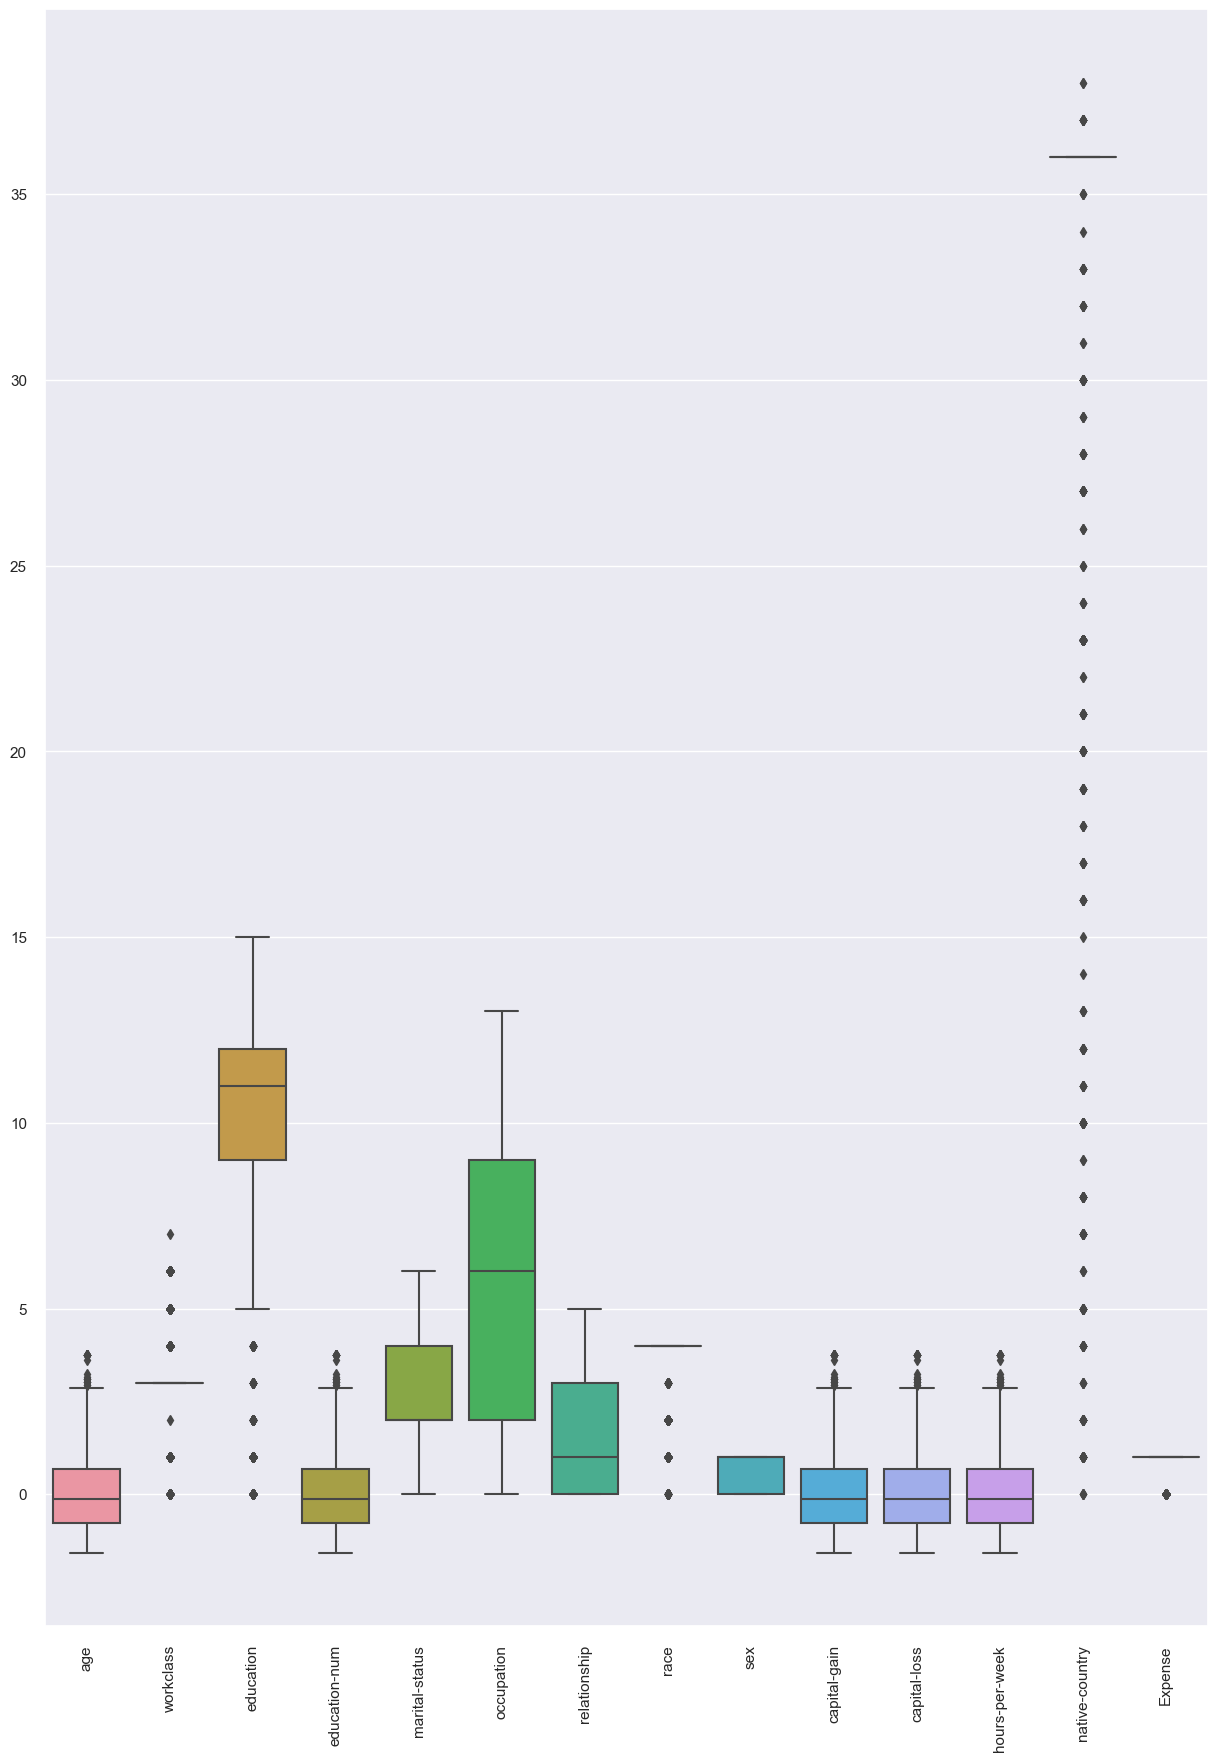

In [51]:
plt.figure(figsize=(15,21))
sns.boxplot(df.select_dtypes(include=np.number))
plt.xticks(rotation=90)
plt.show()

In [52]:
# Recalculate VIF for the remaining features
vif_data_remaining = pd.DataFrame()
vif_data_remaining["Feature"] = df.columns
vif_data_remaining["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

print(vif_data_remaining)

           Feature        VIF
0              age        inf
1        workclass   8.199294
2        education   7.537524
3    education-num        inf
4   marital-status   4.255292
5       occupation   2.939056
6     relationship   2.755383
7             race  16.425313
8              sex   4.287765
9     capital-gain        inf
10    capital-loss        inf
11  hours-per-week        inf
12  native-country  22.129398
13         Expense   4.348096


In [53]:
## droping inf columns

In [54]:
import statsmodels.api as sma
import statsmodels.formula.api as sfa

Y=df.Expense
X=df[["workclass","education","marital-status","occupation","relationship", "race","sex","native-country"]]
X=sma.add_constant(X)            

In [55]:
X.head()

,const,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,1.0,4,9,2,3,0,4,1,36
1,1.0,3,15,4,7,3,4,1,36
2,1.0,3,10,2,9,0,4,1,36
3,1.0,6,11,2,9,5,4,0,36
4,1.0,1,9,4,9,3,4,0,36


In [56]:
from sklearn.model_selection import train_test_split

In [57]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,
                                              test_size=0.30,
                                              stratify=Y,
                                              random_state=21)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((3500, 9), (1500, 9), (3500,), (1500,))

In [58]:



base_model=sma.Logit(ytrain,xtrain).fit()
base_model.summary()

Optimization terminated successfully.
         Current function value: 0.501415
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Expense   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3491
Method:                           MLE   Df Model:                            8
Date:                Tue, 09 Jan 2024   Pseudo R-squ.:                 0.09917
Time:                        18:29:22   Log-Likelihood:                -1755.0
converged:                       True   LL-Null:                       -1948.1
Covariance Type:            nonrobust   LLR p-value:                 1.519e-78
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.0080      0.380      5.284      0.000       1.263       2.753
workclass         -0.0270      0.036     -0.742      0.458      -0.098       0.044
education         -0.0483      0.012     -4.152      0.000      -0.071      -0.025
marital-status     0.3164      0.032      9.974      0.000       0.254       0.379
occupation        -0.0326      0.010     -3.194      0.001      -0.053      -0.013
relationship       0.2539      0.036      6.978      0.000       0.183       0.325
race              -0.0677      0.056     -1.205      0.228      -0.178       0.042
sex               -0.6340      0.125     -5.071      0.000      -0.879      -0.389
native-country    -0.0125      0.008     -1.660      0.097      -0.027       0.002
==================================================================================
"""

<Axes: >

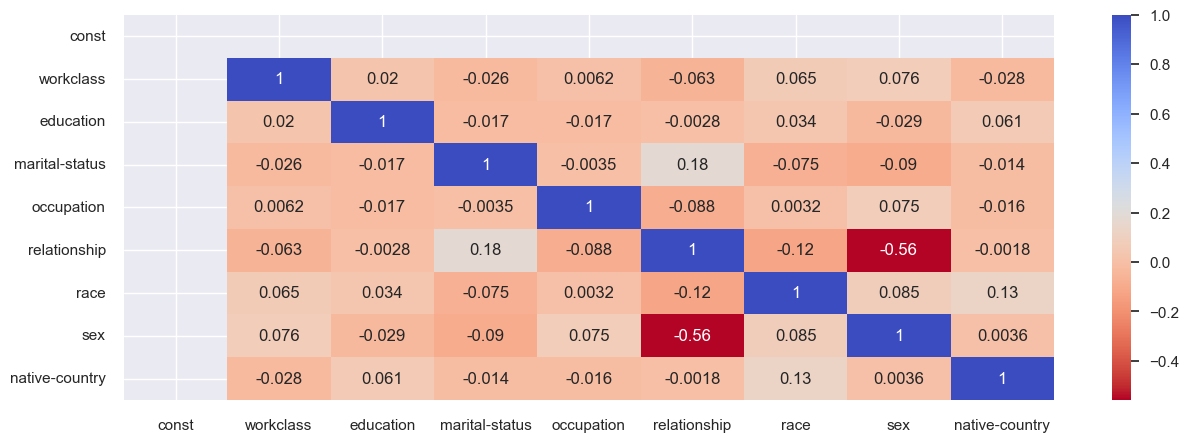

In [59]:
plt.figure(figsize=(15,5))
sns.heatmap(xtrain.corr(),annot=True,cmap="coolwarm_r")

In [60]:
# Example: Remove features with VIF greater than a threshold (e.g., 5)
# Assuming 'X' is your feature matrix
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)
high_vif_features = vif_data[vif_data["VIF"] >5]["Feature"]
X_selected= X.drop(columns=high_vif_features)
print(X_selected.info())

          Feature        VIF
0           const  71.680008
1       workclass   1.011848
2       education   1.010910
3  marital-status   1.036762
4      occupation   1.011452
5    relationship   1.515323
6            race   1.032491
7             sex   1.486318
8  native-country   1.018431
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   workclass       5000 non-null   int32
 1   education       5000 non-null   int32
 2   marital-status  5000 non-null   int32
 3   occupation      5000 non-null   int32
 4   relationship    5000 non-null   int32
 5   race            5000 non-null   int32
 6   sex             5000 non-null   int32
 7   native-country  5000 non-null   int32
dtypes: int32(8)
memory usage: 156.4 KB
None


In [61]:
# Recalculate VIF for the remaining features
vif_data_remaining = pd.DataFrame()
vif_data_remaining["Feature"] = X_selected.columns
vif_data_remaining["VIF"] = [variance_inflation_factor(X_selected.values, i) for i in range(X_selected.shape[1])]

print(vif_data_remaining)

          Feature        VIF
0       workclass   8.109938
1       education   7.536375
2  marital-status   3.937135
3      occupation   2.938256
4    relationship   2.549034
5            race  16.298264
6             sex   4.260779
7  native-country  21.245187


In [62]:
n=X_selected

y=Y

x=sma.add_constant(n)


xtrain,xtest,ytrain,ytest=train_test_split(x,y,
                                          test_size=0.20,
                                          random_state=21,
                                          stratify=y)

xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

base_model=sma.Logit(ytrain,xtrain).fit()
base_model.summary()

Optimization terminated successfully.
         Current function value: 0.498193
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Expense   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3991
Method:                           MLE   Df Model:                            8
Date:                Tue, 09 Jan 2024   Pseudo R-squ.:                  0.1048
Time:                        18:29:24   Log-Likelihood:                -1992.8
converged:                       True   LL-Null:                       -2226.0
Covariance Type:            nonrobust   LLR p-value:                 1.127e-95
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.9448      0.351      5.542      0.000       1.257       2.633
workclass         -0.0140      0.035     -0.405      0.685      -0.082       0.054
education         -0.0474      0.011     -4.370      0.000      -0.069      -0.026
marital-status     0.3267      0.030     10.914      0.000       0.268       0.385
occupation        -0.0371      0.010     -3.865      0.000      -0.056      -0.018
relationship       0.2488      0.034      7.272      0.000       0.182       0.316
race              -0.0887      0.052     -1.705      0.088      -0.191       0.013
sex               -0.7129      0.118     -6.028      0.000      -0.945      -0.481
native-country    -0.0079      0.007     -1.148      0.251      -0.021       0.006
==================================================================================
"""

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

y_pred_lr_train=lr.predict(xtrain)
y_pred_lr_test=lr.predict(xtest)

y_pred_lr_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [65]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,recall_score,precision_score,roc_curve,roc_auc_score

In [66]:
print("prediction on train data")
print("accuracy score:",accuracy_score(ytrain,y_pred_lr_train))
print("confusion matrix:\n",confusion_matrix(ytrain,y_pred_lr_train))
print(" classification report:\n",classification_report(ytrain,y_pred_lr_train))
    

prediction on train data
accuracy score: 0.7485
confusion matrix:
 [[   9  970]
 [  36 2985]]
 classification report:
               precision    recall  f1-score   support

           0       0.20      0.01      0.02       979
           1       0.75      0.99      0.86      3021

    accuracy                           0.75      4000
   macro avg       0.48      0.50      0.44      4000
weighted avg       0.62      0.75      0.65      4000



In [67]:
print("prediction on test data")
print("accuracy score:",accuracy_score(ytest,y_pred_lr_test))
print("confusion matrix:\n",confusion_matrix(ytest,y_pred_lr_test))
print(" classification report:\n",classification_report(ytest,y_pred_lr_test))
    

prediction on test data
accuracy score: 0.745
confusion matrix:
 [[  3 242]
 [ 13 742]]
 classification report:
               precision    recall  f1-score   support

           0       0.19      0.01      0.02       245
           1       0.75      0.98      0.85       755

    accuracy                           0.74      1000
   macro avg       0.47      0.50      0.44      1000
weighted avg       0.62      0.74      0.65      1000



In [68]:

def validation(pred,test):
    print("Accuracy Score:", accuracy_score(pred,test))
    print("Confusion Matrix:\n", confusion_matrix(pred,test))
    print("Classification Report:\n", classification_report(pred,test))
    


In [69]:
def roccurve(test,pred):
    fpr,tpr,thres = roc_curve(test,pred)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],color='r',ls='--')
    plt.title('ROC AUC %.2f'%roc_auc_score(test,pred))
    plt.show()

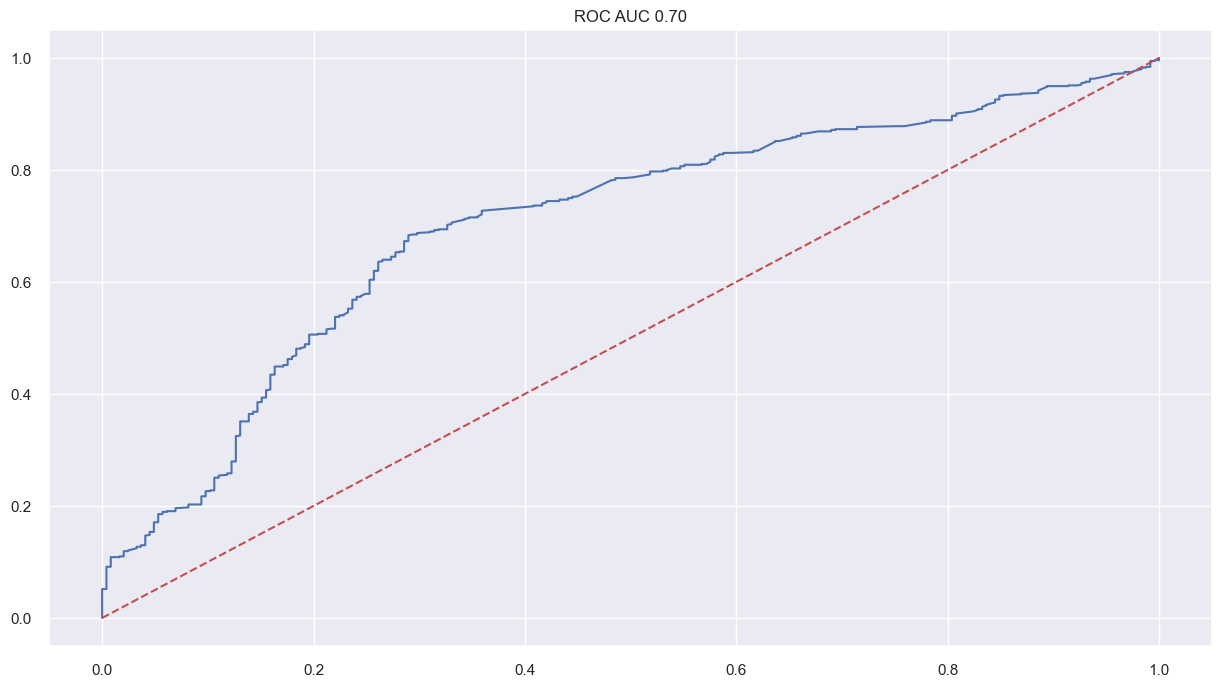

In [70]:

y_pred_prob_lr=lr.predict_proba(xtest)[:,1]
roccurve(ytest,y_pred_prob_lr)

* logistic is under fit

In [71]:
perf_score = pd.DataFrame(columns=["Model", "Accuracy","Recall","Precision","F1 Score"] )

In [72]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,recall_score,precision_score

In [73]:

def per_measures(model,test,pred):


    accuracy    =accuracy_score(test,pred)
    f1score     =f1_score(test,pred)
    recall      =recall_score(test,pred)
    precision   =precision_score(test,pred)
  # aic         =model.aic
  # reliability = cohen_kappa_score(test,pred)



    return (accuracy,recall,precision,f1score,)
  
def update_performance (name,
                        model,
                        test,
                        pred
                           ):

    # assign 'comp_perf' as global variable
    global perf_score


    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    perf_score = perf_score.append({'Model'       : name,
                                    'Accuracy'   : per_measures(model,test,pred)[0],
                                    'Recall'      : per_measures(model,test,pred)[1],
                                    'Precision'   : per_measures(model,test,pred)[2],
                                    'F1 Score'    : per_measures(model,test,pred)[3]
                                    # 'AIC'         : per_measures(model,ytest,ypred)[4],
                                    # 'Reliability' : per_measures(model,ytest,ypred)[5]

                                     },
                                   ignore_index = True)

In [74]:
update_performance(name="LogisticReg-skl(test data)",model=lr,test=ytest,pred=y_pred_lr_test)
update_performance(name="LogisticReg-skl(train data)",model=lr,test=ytrain,pred=y_pred_lr_train)

In [75]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-skl(test data),0.7450,0.982781,0.754065,0.853364
1,LogisticReg-skl(train data),0.7485,0.988083,0.754741,0.855791


In [76]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB

In [77]:
model = GaussianNB(priors=[0,1], var_smoothing=1e-09)

# Train the model
model.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred_nb = model.predict(xtest)

# y_pred on train data
y_pred_nb_train=model.predict(xtrain)

validation(ytest,y_pred_nb)

Accuracy Score: 0.755
Confusion Matrix:
 [[  0 245]
 [  0 755]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       245
           1       0.76      1.00      0.86       755

    accuracy                           0.76      1000
   macro avg       0.38      0.50      0.43      1000
weighted avg       0.57      0.76      0.65      1000



In [78]:
validation(ytrain,y_pred_nb_train)

Accuracy Score: 0.75525
Confusion Matrix:
 [[   0  979]
 [   0 3021]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       979
           1       0.76      1.00      0.86      3021

    accuracy                           0.76      4000
   macro avg       0.38      0.50      0.43      4000
weighted avg       0.57      0.76      0.65      4000



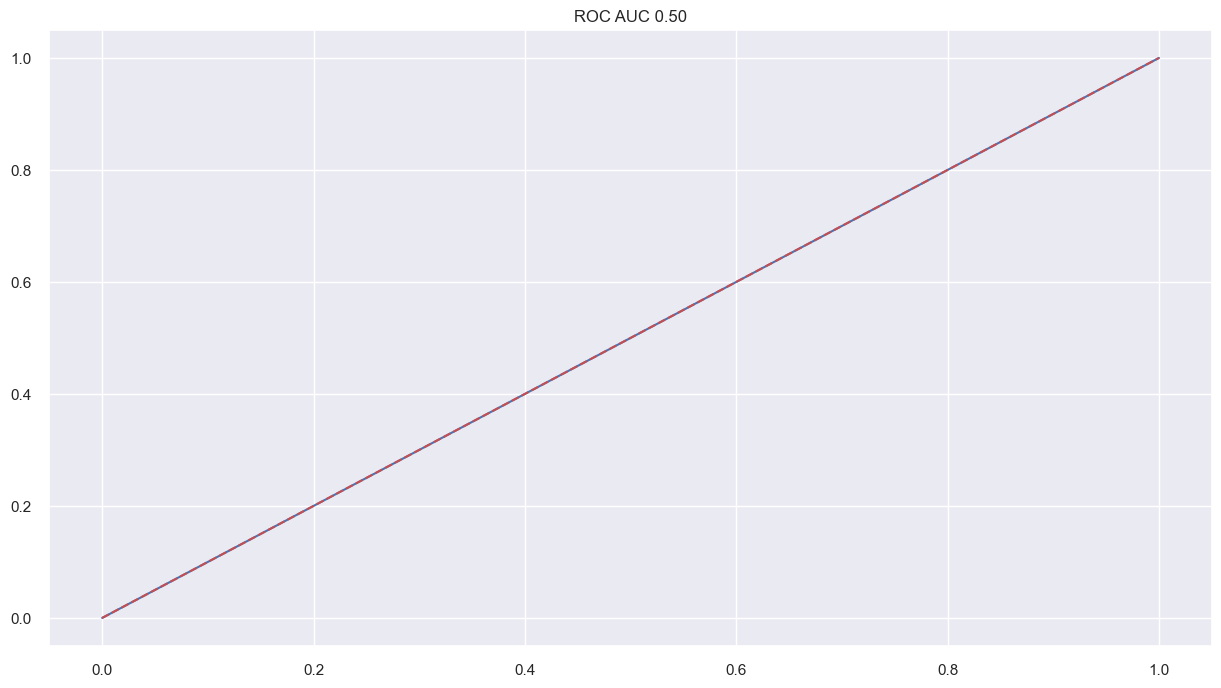

In [79]:
y_pred_nb=model.predict(xtest)
y_pred_prob_nb=model.predict_proba(xtest)[:,1]
roccurve(ytest,y_pred_prob_nb)

In [80]:

update_performance(name="Gausian_NB(train data)",model=model,test=ytrain,pred=y_pred_nb_train)
update_performance(name="Gausian_NB(test data)",model=model,test=ytest,pred=y_pred_nb)

In [81]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-skl(test data),0.74500,0.982781,0.754065,0.853364
1,LogisticReg-skl(train data),0.74850,0.988083,0.754741,0.855791
2,Gausian_NB(train data),0.75525,1.000000,0.755250,0.860561
3,Gausian_NB(test data),0.75500,1.000000,0.755000,0.860399


In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,weights="uniform",algorithm="auto")

# Train the model
knn.fit(xtrain,ytrain)

# Make predictions on the test set
y_pred_knn = knn.predict(xtest)

# y_pred on train data
y_pred_knn_train=knn.predict(xtrain)


# Evaluate the model
accuracy = accuracy_score(ytest, y_pred_knn)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("test data:")
print(validation(ytest,y_pred_knn))
print("train data:")
print(validation(ytrain,y_pred_knn_train))

Accuracy: 0.81
test data:
Accuracy Score: 0.808
Confusion Matrix:
 [[135 110]
 [ 82 673]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.55      0.58       245
           1       0.86      0.89      0.88       755

    accuracy                           0.81      1000
   macro avg       0.74      0.72      0.73      1000
weighted avg       0.80      0.81      0.80      1000

None
train data:
Accuracy Score: 0.8385
Confusion Matrix:
 [[ 568  411]
 [ 235 2786]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.58      0.64       979
           1       0.87      0.92      0.90      3021

    accuracy                           0.84      4000
   macro avg       0.79      0.75      0.77      4000
weighted avg       0.83      0.84      0.83      4000

None


In [83]:

update_performance(name="KNN-(train data)",model=knn,test=ytrain,pred=y_pred_knn_train)
update_performance(name="KNN-(test data)",model=knn,test=ytest,pred=y_pred_knn)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-skl(test data),0.74500,0.982781,0.754065,0.853364
1,LogisticReg-skl(train data),0.74850,0.988083,0.754741,0.855791
2,Gausian_NB(train data),0.75525,1.000000,0.755250,0.860561
3,Gausian_NB(test data),0.75500,1.000000,0.755000,0.860399
4,KNN-(train data),0.83850,0.922211,0.871442,0.896108
5,KNN-(test data),0.80800,0.891391,0.859515,0.875163


In [84]:
clf = RandomForestClassifier(n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None)
clf.fit(xtrain, ytrain)

# Make predictions
y_pred_ran = clf.predict(xtest)



# Make predictions on train data
y_pred_ran_train = clf.predict(xtrain)

# Model Evaluation
accuracy = accuracy_score(ytest, y_pred_ran)
confusion = confusion_matrix(ytest, y_pred_ran)
classification_rep = classification_report(ytest, y_pred_ran)

# Display classification report
print("test data:")
print(validation(ytest,y_pred_ran))
print("train data:")
print(validation(ytrain,y_pred_ran_train))






test data:
Accuracy Score: 0.81
Confusion Matrix:
 [[137 108]
 [ 82 673]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.56      0.59       245
           1       0.86      0.89      0.88       755

    accuracy                           0.81      1000
   macro avg       0.74      0.73      0.73      1000
weighted avg       0.80      0.81      0.81      1000

None
train data:
Accuracy Score: 0.89025
Confusion Matrix:
 [[ 699  280]
 [ 159 2862]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.71      0.76       979
           1       0.91      0.95      0.93      3021

    accuracy                           0.89      4000
   macro avg       0.86      0.83      0.84      4000
weighted avg       0.89      0.89      0.89      4000

None


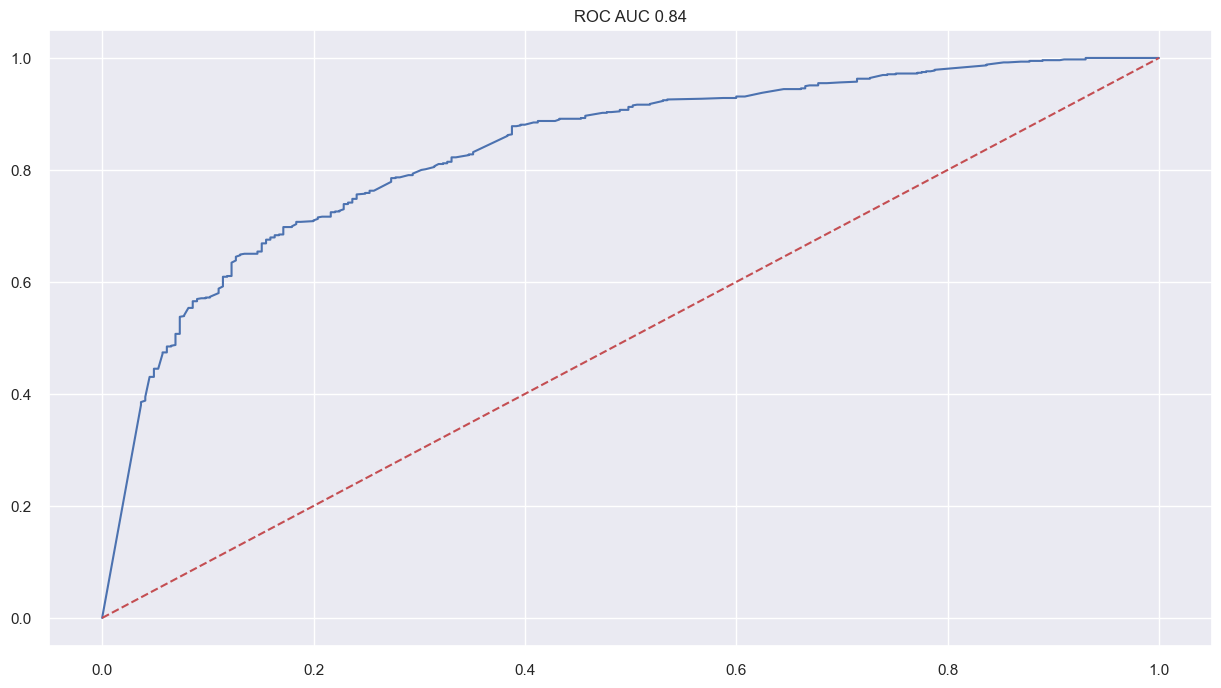

In [85]:

y_pred_prob_ran=clf.predict_proba(xtest)[:,1]
roccurve(ytest,y_pred_prob_ran)

In [86]:
update_performance(name="Random forest(train data)",model=clf,test=ytrain,pred=y_pred_ran_train)
update_performance(name="Random forest(test data)",model=clf,test=ytest,pred=y_pred_ran)

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:


dt=DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=6,
    min_samples_split=3,
    min_samples_leaf=2,
    min_weight_fraction_leaf=0.0,
    max_features=13,
    random_state=200,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,)
dt.fit(xtrain,ytrain)
dt

DecisionTreeClassifier(max_depth=6, max_features=13, min_samples_leaf=2,
                       min_samples_split=3, random_state=200)

In [89]:

# Make predictions on train data
y_pred_dt_train=dt.predict(xtrain)


# Make predictions on test data

y_pred_dt=dt.predict(xtest)

In [90]:
# Display classification report
print("test data:")
print(validation(ytest,y_pred_dt))
print("train data:")
print(validation(ytrain,y_pred_dt_train))


test data:
Accuracy Score: 0.803
Confusion Matrix:
 [[118 127]
 [ 70 685]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.48      0.55       245
           1       0.84      0.91      0.87       755

    accuracy                           0.80      1000
   macro avg       0.74      0.69      0.71      1000
weighted avg       0.79      0.80      0.79      1000

None
train data:
Accuracy Score: 0.826
Confusion Matrix:
 [[ 487  492]
 [ 204 2817]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.50      0.58       979
           1       0.85      0.93      0.89      3021

    accuracy                           0.83      4000
   macro avg       0.78      0.71      0.74      4000
weighted avg       0.82      0.83      0.81      4000

None


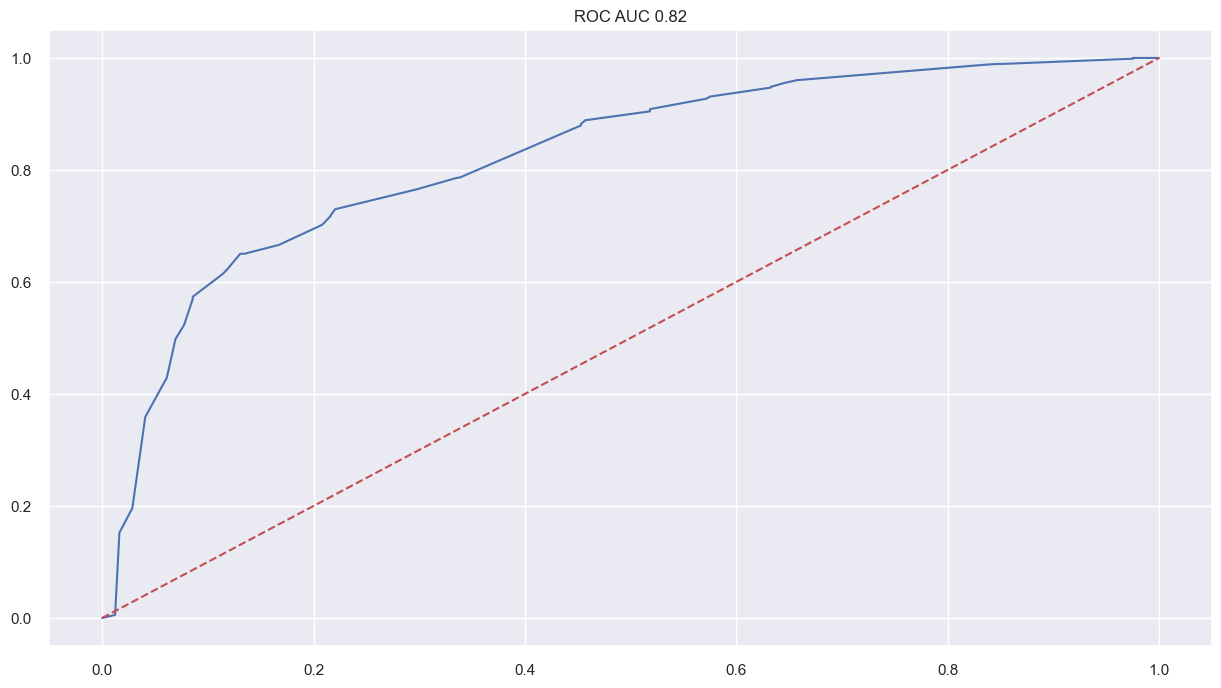

In [91]:

y_pred_prob_dt=dt.predict_proba(xtest)[:,1]
roccurve(ytest,y_pred_prob_dt)

In [92]:
update_performance(name = 'Decission-tree(tarin data)', model = dt,test=ytrain,pred=y_pred_dt_train)
update_performance(name = 'Decission-tree(test data)', model = dt,test=ytest,pred=y_pred_dt)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-skl(test data),0.74500,0.982781,0.754065,0.853364
1,LogisticReg-skl(train data),0.74850,0.988083,0.754741,0.855791
2,Gausian_NB(train data),0.75525,1.000000,0.755250,0.860561
3,Gausian_NB(test data),0.75500,1.000000,0.755000,0.860399
4,KNN-(train data),0.83850,0.922211,0.871442,0.896108
5,KNN-(test data),0.80800,0.891391,0.859515,0.875163
6,Random forest(train data),0.89025,0.947368,0.910885,0.928768
7,Random forest(test data),0.81000,0.891391,0.861716,0.876302
8,Decission-tree(tarin data),0.82600,0.932473,0.851315,0.890047
9,Decission-tree(test data),0.80300,0.907285,0.843596,0.874282


In [93]:
bnb = BernoulliNB()

bnb.fit(xtrain,ytrain)

# Make predictions on test data

y_pred_bnb=bnb.predict(xtest)

# Make predictions on train  data

y_pred_bnb_train = bnb.predict(xtrain)

# Display classification report
print("test data:")
print(validation(ytest,y_pred_bnb))
print("train data:")
print(validation(ytrain,y_pred_bnb_train))

update_performance(name = 'Bernoulli NB(train data)', model = bnb,test=ytrain,pred=y_pred_bnb_train)
update_performance(name = 'Bernoulli NB(test data)', model = bnb,test=ytest,pred=y_pred_bnb)

# print the dataframe
perf_score

test data:
Accuracy Score: 0.712
Confusion Matrix:
 [[171  74]
 [214 541]]
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.70      0.54       245
           1       0.88      0.72      0.79       755

    accuracy                           0.71      1000
   macro avg       0.66      0.71      0.67      1000
weighted avg       0.77      0.71      0.73      1000

None
train data:
Accuracy Score: 0.73525
Confusion Matrix:
 [[ 703  276]
 [ 783 2238]]
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.72      0.57       979
           1       0.89      0.74      0.81      3021

    accuracy                           0.74      4000
   macro avg       0.68      0.73      0.69      4000
weighted avg       0.79      0.74      0.75      4000

None


,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-skl(test data),0.74500,0.982781,0.754065,0.853364
1,LogisticReg-skl(train data),0.74850,0.988083,0.754741,0.855791
2,Gausian_NB(train data),0.75525,1.000000,0.755250,0.860561
3,Gausian_NB(test data),0.75500,1.000000,0.755000,0.860399
4,KNN-(train data),0.83850,0.922211,0.871442,0.896108
5,KNN-(test data),0.80800,0.891391,0.859515,0.875163
6,Random forest(train data),0.89025,0.947368,0.910885,0.928768
7,Random forest(test data),0.81000,0.891391,0.861716,0.876302
8,Decission-tree(tarin data),0.82600,0.932473,0.851315,0.890047
9,Decission-tree(test data),0.80300,0.907285,0.843596,0.874282


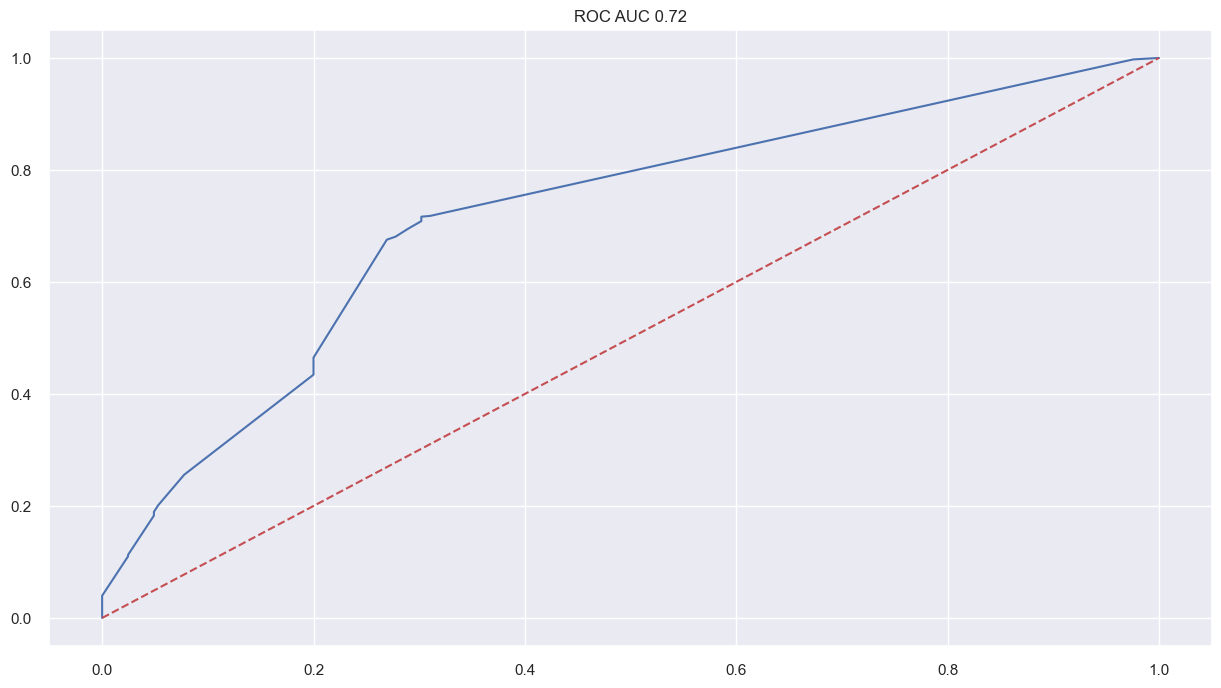

In [94]:
y_pred_prob_bnb=bnb.predict_proba(xtest)[:,1]
roccurve(ytest,y_pred_prob_bnb)

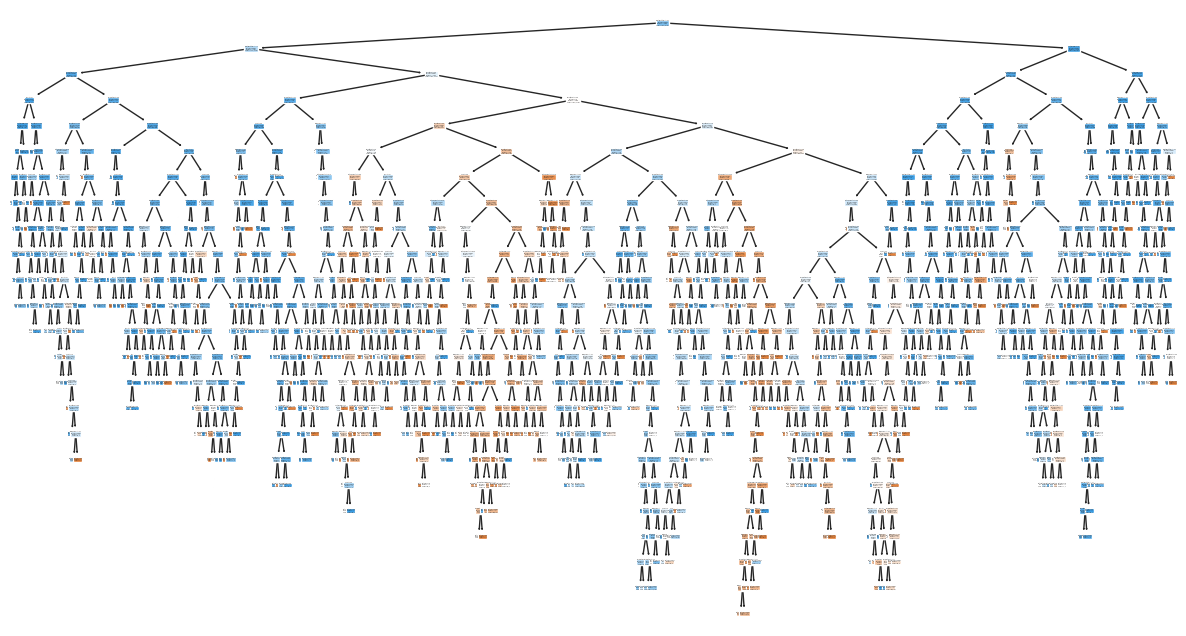

In [95]:
import matplotlib.pyplot as plt


x=n
y=y
dt=DecisionTreeClassifier(criterion="entropy")
dt.fit(x,y)
plot_tree(dt,feature_names=x.columns.tolist(),filled=True)
plt.show()

In [96]:
pd.DataFrame({"Features Importance":dt.feature_importances_},
            index=dt.feature_names_in_)

,Features Importance
workclass,0.118872
education,0.178452
marital-status,0.360615
occupation,0.154522
relationship,0.048613
race,0.054775
sex,0.027317
native-country,0.056834


In [97]:
tuned_paramaters = [{'criterion': ['entropy','gini'],
                     'max_depth': [5,10],  # 5,6,7,
                     'max_features': ["sqrt", "log2"], # it can be either square root of the feature or log of number of features
                     'min_samples_split': [2,5,8], # 1-3% of the total records
                     'min_samples_leaf': [1,5,9], # 1-3% of the min_sample_split
                     'max_leaf_nodes': [5,8]}]

In [98]:
dt=DecisionTreeClassifier(random_state=30)

tree_grid=GridSearchCV(estimator=dt,
                    param_grid=tuned_paramaters,
                      cv=5)

In [99]:
tree_grid_model=tree_grid.fit(xtrain,ytrain)

In [100]:
tree_grid_model

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=30),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': [5, 10],
                          'max_features': ['sqrt', 'log2'],
                          'max_leaf_nodes': [5, 8],
                          'min_samples_leaf': [1, 5, 9],
                          'min_samples_split': [2, 5, 8]}])

In [101]:
tree_grid_model.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [102]:
dt_grid_model = DecisionTreeClassifier(criterion = 'entropy',
                                  max_depth = 5,
                                  max_features = 'sqrt',
                                  max_leaf_nodes = 8,
                                  min_samples_leaf = 1,
                                  min_samples_split = 2,
                                  random_state = 10)

In [103]:
dt_grid_model=dt_grid_model.fit(xtrain,ytrain)


# prediction on test data
y_ypred_dt_tp=dt_grid_model.predict(xtest)

# prediction on train data
y_ypred_dt_tp_train=dt_grid_model.predict(xtrain)



# Display classification report
print("test data:")
print(validation(ytest,y_ypred_dt_tp))
print("train data:")
print(validation(ytrain,y_ypred_dt_tp_train))

update_performance(name = 'dt_gridsearch(train data)', model = dt_grid_model,test=ytrain,pred=y_ypred_dt_tp_train)
update_performance(name = 'dt_gridsearch(test data)', model = dt_grid_model,test=ytest,pred=y_ypred_dt_tp)
# print the dataframe
perf_score

test data:
Accuracy Score: 0.781
Confusion Matrix:
 [[ 87 158]
 [ 61 694]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.36      0.44       245
           1       0.81      0.92      0.86       755

    accuracy                           0.78      1000
   macro avg       0.70      0.64      0.65      1000
weighted avg       0.76      0.78      0.76      1000

None
train data:
Accuracy Score: 0.788
Confusion Matrix:
 [[ 313  666]
 [ 182 2839]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.32      0.42       979
           1       0.81      0.94      0.87      3021

    accuracy                           0.79      4000
   macro avg       0.72      0.63      0.65      4000
weighted avg       0.77      0.79      0.76      4000

None


,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-skl(test data),0.74500,0.982781,0.754065,0.853364
1,LogisticReg-skl(train data),0.74850,0.988083,0.754741,0.855791
2,Gausian_NB(train data),0.75525,1.000000,0.755250,0.860561
3,Gausian_NB(test data),0.75500,1.000000,0.755000,0.860399
4,KNN-(train data),0.83850,0.922211,0.871442,0.896108
5,KNN-(test data),0.80800,0.891391,0.859515,0.875163
6,Random forest(train data),0.89025,0.947368,0.910885,0.928768
7,Random forest(test data),0.81000,0.891391,0.861716,0.876302
8,Decission-tree(tarin data),0.82600,0.932473,0.851315,0.890047
9,Decission-tree(test data),0.80300,0.907285,0.843596,0.874282


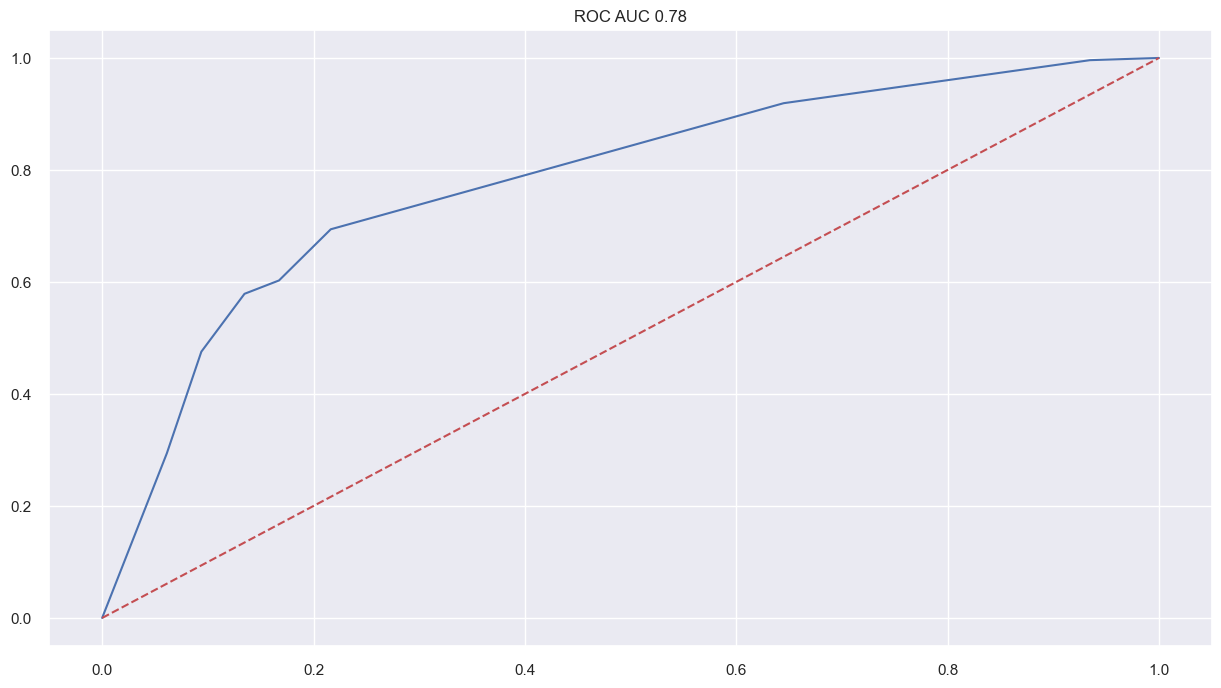

In [104]:
y_pred_prob_dt_tp=dt_grid_model.predict_proba(xtest)[:,1]
roccurve(ytest,y_pred_prob_dt_tp)

In [105]:
params =             [{'criterion': ['entropy', 'gini'],
                     'n_estimators':  [50, 100, 200],
                     'max_depth': [10, 15],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 8],
                     'min_samples_leaf': [5, 9],
                     'max_leaf_nodes': [8, 11]}]

In [106]:
rf =RandomForestClassifier(random_state=10)

rf_cv = GridSearchCV(rf,params,cv=5,scoring='accuracy')

rf_cv.fit(xtrain,ytrain)

rf_cv.best_params_


{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': 11,
 'min_samples_leaf': 9,
 'min_samples_split': 2,
 'n_estimators': 200}

In [107]:
rf_model = RandomForestClassifier(criterion ='gini' ,
                                  n_estimators =100 ,
                                  max_depth = 10 ,
                                  max_features = 'sqrt',
                                  max_leaf_nodes =11 ,
                                  min_samples_leaf =5 ,
                                  min_samples_split = 2,
                                  random_state = 10)
                                  


In [108]:
rf_model.fit(xtrain,ytrain)

y_pred_rf_tp=rf_model.predict(xtest)

In [109]:
update_performance(name = 'Random forest (Hyper tunned parameter)', model = rf_model,test=ytest,pred=y_pred_rf_tp)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-skl(test data),0.74500,0.982781,0.754065,0.853364
1,LogisticReg-skl(train data),0.74850,0.988083,0.754741,0.855791
2,Gausian_NB(train data),0.75525,1.000000,0.755250,0.860561
3,Gausian_NB(test data),0.75500,1.000000,0.755000,0.860399
4,KNN-(train data),0.83850,0.922211,0.871442,0.896108
5,KNN-(test data),0.80800,0.891391,0.859515,0.875163
6,Random forest(train data),0.89025,0.947368,0.910885,0.928768
7,Random forest(test data),0.81000,0.891391,0.861716,0.876302
8,Decission-tree(tarin data),0.82600,0.932473,0.851315,0.890047
9,Decission-tree(test data),0.80300,0.907285,0.843596,0.874282


In [110]:
from sklearn.ensemble import BaggingClassifier

In [111]:
dt=DecisionTreeClassifier(random_state=10)

bg=BaggingClassifier(dt)
bg.fit(xtrain,ytrain)


# prediction on test data
y_pred_bg_dt=bg.predict(xtest)

# prediction on train data
y_pred_bg_dt_train=bg.predict(xtrain)


# Display classification report
print("test data:")
print(validation(ytest,y_pred_bg_dt))
print("train data:")
print(validation(ytrain,y_pred_bg_dt_train))

update_performance(name = 'Bagging classifier(dt)(train data)', model = dt,test=ytrain,pred=y_pred_bg_dt_train)

update_performance(name = 'Bagging classifier(dt)(test data)', model = dt,test=ytest,pred=y_pred_bg_dt)

# print the dataframe
perf_score

test data:
Accuracy Score: 0.8
Confusion Matrix:
 [[139 106]
 [ 94 661]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.57      0.58       245
           1       0.86      0.88      0.87       755

    accuracy                           0.80      1000
   macro avg       0.73      0.72      0.73      1000
weighted avg       0.80      0.80      0.80      1000

None
train data:
Accuracy Score: 0.8865
Confusion Matrix:
 [[ 710  269]
 [ 185 2836]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.73      0.76       979
           1       0.91      0.94      0.93      3021

    accuracy                           0.89      4000
   macro avg       0.85      0.83      0.84      4000
weighted avg       0.88      0.89      0.88      4000

None


,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-skl(test data),0.74500,0.982781,0.754065,0.853364
1,LogisticReg-skl(train data),0.74850,0.988083,0.754741,0.855791
2,Gausian_NB(train data),0.75525,1.000000,0.755250,0.860561
3,Gausian_NB(test data),0.75500,1.000000,0.755000,0.860399
4,KNN-(train data),0.83850,0.922211,0.871442,0.896108
5,KNN-(test data),0.80800,0.891391,0.859515,0.875163
6,Random forest(train data),0.89025,0.947368,0.910885,0.928768
7,Random forest(test data),0.81000,0.891391,0.861716,0.876302
8,Decission-tree(tarin data),0.82600,0.932473,0.851315,0.890047
9,Decission-tree(test data),0.80300,0.907285,0.843596,0.874282


In [112]:
# Define the parameter grid for GridSearchCV
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 15],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 8],
    'min_samples_leaf': [5, 9],
    'max_leaf_nodes': [8, 11],
}

# Create a RandomForestClassifier
rf = RandomForestClassifier(random_state=10)

# Create GridSearchCV without cross-validation
rf_cv = GridSearchCV(rf, params, scoring='accuracy')

# Fit the GridSearchCV to the entire training set
rf_cv.fit(xtrain, ytrain)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", rf_cv.best_params_)

# prediction on test data
y_pred_rf_cv=rf_cv.predict(xtest)

# prediction on train  data
y_pred_rf_cv_train=rf_cv.predict(xtrain)



# Display classification report
print("test data:")
print(validation(ytest,y_pred_rf_cv))
print("train data:")
print(validation(ytrain,y_pred_rf_cv_train))

update_performance(name = 'Gridd search [without cv](train data)', model = rf_cv,test=ytrain,pred=y_pred_rf_cv_train)

update_performance(name = 'Grid search [without cv](test data)', model = rf_cv,test=ytest,pred=y_pred_rf_cv)

# print the dataframe
perf_score

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 11, 'min_samples_leaf': 9, 'min_samples_split': 2, 'n_estimators': 200}
test data:
Accuracy Score: 0.817
Confusion Matrix:
 [[131 114]
 [ 69 686]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.53      0.59       245
           1       0.86      0.91      0.88       755

    accuracy                           0.82      1000
   macro avg       0.76      0.72      0.74      1000
weighted avg       0.81      0.82      0.81      1000

None
train data:
Accuracy Score: 0.82575
Confusion Matrix:
 [[ 509  470]
 [ 227 2794]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.52      0.59       979
           1       0.86      0.92      0.89      3021

    accuracy                           0.83      4000
   macro avg       0.77      0.72      0.74      4000
weighted avg       0.82      0.83      0.8

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-skl(test data),0.74500,0.982781,0.754065,0.853364
1,LogisticReg-skl(train data),0.74850,0.988083,0.754741,0.855791
2,Gausian_NB(train data),0.75525,1.000000,0.755250,0.860561
3,Gausian_NB(test data),0.75500,1.000000,0.755000,0.860399
4,KNN-(train data),0.83850,0.922211,0.871442,0.896108
5,KNN-(test data),0.80800,0.891391,0.859515,0.875163
6,Random forest(train data),0.89025,0.947368,0.910885,0.928768
7,Random forest(test data),0.81000,0.891391,0.861716,0.876302
8,Decission-tree(tarin data),0.82600,0.932473,0.851315,0.890047
9,Decission-tree(test data),0.80300,0.907285,0.843596,0.874282


In [113]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
params = {
    'objective': 'multi:softmax',  # Classification task
    'num_class': 3,  # Number of classes in the target variable
    'learning_rate': 0.1,
    'n_estimators': 100,
    'max_depth': 3,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 0,
    'eval_metric': 'mlogloss',  # Multiclass Logloss
}
# Create XGBoost model

model = xgb.XGBClassifier(**params)

# Train the model
model.fit(xtrain, ytrain, eval_set=[(xtest, ytest)], early_stopping_rounds=10, verbose=True)

# Make predictions on the test set
y_pred_xgb= model.predict(xtest)


# Make predictions on the train set
y_pred_xgb_train = model.predict(xtrain)


accuracy = accuracy_score(ytest, y_pred_xgb)
print(f'Accuracy: {accuracy:.2f}')


# Display classification report
print("test data:")
print(validation(ytest,y_pred_xgb))
print("train data:")
print(validation(ytrain,y_pred_xgb_train))

update_performance(name = 'XGB(train data)', model = model,test=ytrain,pred=y_pred_xgb_train)

update_performance(name = 'XGB(test data)', model = model,test=ytest,pred=y_pred_xgb)

# print the dataframe
perf_score

[0]	validation_0-mlogloss:1.01555
[1]	validation_0-mlogloss:0.94617
[2]	validation_0-mlogloss:0.88603
[3]	validation_0-mlogloss:0.83441
[4]	validation_0-mlogloss:0.78930
[5]	validation_0-mlogloss:0.75004
[6]	validation_0-mlogloss:0.71584
[7]	validation_0-mlogloss:0.68651
[8]	validation_0-mlogloss:0.65985
[9]	validation_0-mlogloss:0.63636
[10]	validation_0-mlogloss:0.61597
[11]	validation_0-mlogloss:0.59761
[12]	validation_0-mlogloss:0.58118
[13]	validation_0-mlogloss:0.56611
[14]	validation_0-mlogloss:0.55295
[15]	validation_0-mlogloss:0.54014
[16]	validation_0-mlogloss:0.52925
[17]	validation_0-mlogloss:0.51907
[18]	validation_0-mlogloss:0.51000
[19]	validation_0-mlogloss:0.50169
[20]	validation_0-mlogloss:0.49376
[21]	validation_0-mlogloss:0.48669
[22]	validation_0-mlogloss:0.47999
[23]	validation_0-mlogloss:0.47465
[24]	validation_0-mlogloss:0.46947
[25]	validation_0-mlogloss:0.46439
[26]	validation_0-mlogloss:0.45903
[27]	validation_0-mlogloss:0.45468
[28]	validation_0-mlogloss:0.4

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-skl(test data),0.74500,0.982781,0.754065,0.853364
1,LogisticReg-skl(train data),0.74850,0.988083,0.754741,0.855791
2,Gausian_NB(train data),0.75525,1.000000,0.755250,0.860561
3,Gausian_NB(test data),0.75500,1.000000,0.755000,0.860399
4,KNN-(train data),0.83850,0.922211,0.871442,0.896108
5,KNN-(test data),0.80800,0.891391,0.859515,0.875163
6,Random forest(train data),0.89025,0.947368,0.910885,0.928768
7,Random forest(test data),0.81000,0.891391,0.861716,0.876302
8,Decission-tree(tarin data),0.82600,0.932473,0.851315,0.890047
9,Decission-tree(test data),0.80300,0.907285,0.843596,0.874282


In [114]:
from sklearn.ensemble import AdaBoostClassifier

In [115]:
params = {
    'n_estimators': 50,        # Number of weak learners (base classifiers)
    'learning_rate': 1.0,      # Weighting applied to each weak learner's contribution
    'algorithm': 'SAMME.R',    # Algorithm to use for updating weights
    'random_state': 42,        # Random seed for reproducibility
}

# Create AdaBoost model for classification
model = AdaBoostClassifier(**params)

# Train the model
model.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred_ada = model.predict(xtest)

# Make predictions on the train set
y_pred_ada_train = model.predict(xtrain)

# Evaluate the model
accuracy = accuracy_score(ytest, y_pred_ada)
print(f'Accuracy: {accuracy:.2f}')


# Display classification report
print("test data:")
print(validation(ytest,y_pred_ada))
print("train data:")
print(validation(ytrain,y_pred_ada_train))

update_performance(name = 'Adaboost(train data)', model = model,test=ytrain,pred=y_pred_ada_train)

update_performance(name = 'Adaboost(test data)', model = model,test=ytest,pred=y_pred_ada)

# print the dataframe
perf_score

Accuracy: 0.82
test data:
Accuracy Score: 0.823
Confusion Matrix:
 [[135 110]
 [ 67 688]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.55      0.60       245
           1       0.86      0.91      0.89       755

    accuracy                           0.82      1000
   macro avg       0.77      0.73      0.75      1000
weighted avg       0.81      0.82      0.82      1000

None
train data:
Accuracy Score: 0.81975
Confusion Matrix:
 [[ 501  478]
 [ 243 2778]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.51      0.58       979
           1       0.85      0.92      0.89      3021

    accuracy                           0.82      4000
   macro avg       0.76      0.72      0.73      4000
weighted avg       0.81      0.82      0.81      4000

None


,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-skl(test data),0.74500,0.982781,0.754065,0.853364
1,LogisticReg-skl(train data),0.74850,0.988083,0.754741,0.855791
2,Gausian_NB(train data),0.75525,1.000000,0.755250,0.860561
3,Gausian_NB(test data),0.75500,1.000000,0.755000,0.860399
4,KNN-(train data),0.83850,0.922211,0.871442,0.896108
5,KNN-(test data),0.80800,0.891391,0.859515,0.875163
6,Random forest(train data),0.89025,0.947368,0.910885,0.928768
7,Random forest(test data),0.81000,0.891391,0.861716,0.876302
8,Decission-tree(tarin data),0.82600,0.932473,0.851315,0.890047
9,Decission-tree(test data),0.80300,0.907285,0.843596,0.874282


In [116]:
from sklearn.ensemble import GradientBoostingClassifier
params = {
    'n_estimators': 100,      # Number of boosting stages to be run
    'learning_rate': 0.1,     # Step size shrinkage to prevent overfitting
    'max_depth': 3,           # Maximum depth of the individual trees
    'subsample': 1.0,         # Fraction of samples used for fitting the individual trees
    'random_state': 42        # Seed for reproducibility
}

# Create Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(**params)

# Train the model
gb_classifier.fit(xtrain, ytrain)

# Make predictions
y_pred_gb= gb_classifier.predict(xtest)

# Make predictions on the train set
y_pred_gb_train= gb_classifier.predict(xtrain)

# Evaluate the model
accuracy = accuracy_score(ytest, y_pred_gb)
print(f'Accuracy: {accuracy:.2f}')


# Display classification report
print("test data:")
print(validation(ytest,y_pred_gb))
print("train data:")
print(validation(ytrain,y_pred_gb_train))

update_performance(name = 'GradientBoosting(train data)', model = gb_classifier,test=ytrain,pred=y_pred_gb_train)

update_performance(name = 'GradientBoosting(test data)', model = gb_classifier,test=ytest,pred=y_pred_gb)

# print the dataframe
perf_score

Accuracy: 0.83
test data:
Accuracy Score: 0.826
Confusion Matrix:
 [[132 113]
 [ 61 694]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.54      0.60       245
           1       0.86      0.92      0.89       755

    accuracy                           0.83      1000
   macro avg       0.77      0.73      0.75      1000
weighted avg       0.82      0.83      0.82      1000

None
train data:
Accuracy Score: 0.83575
Confusion Matrix:
 [[ 533  446]
 [ 211 2810]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.54      0.62       979
           1       0.86      0.93      0.90      3021

    accuracy                           0.84      4000
   macro avg       0.79      0.74      0.76      4000
weighted avg       0.83      0.84      0.83      4000

None


,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-skl(test data),0.74500,0.982781,0.754065,0.853364
1,LogisticReg-skl(train data),0.74850,0.988083,0.754741,0.855791
2,Gausian_NB(train data),0.75525,1.000000,0.755250,0.860561
3,Gausian_NB(test data),0.75500,1.000000,0.755000,0.860399
4,KNN-(train data),0.83850,0.922211,0.871442,0.896108
5,KNN-(test data),0.80800,0.891391,0.859515,0.875163
6,Random forest(train data),0.89025,0.947368,0.910885,0.928768
7,Random forest(test data),0.81000,0.891391,0.861716,0.876302
8,Decission-tree(tarin data),0.82600,0.932473,0.851315,0.890047
9,Decission-tree(test data),0.80300,0.907285,0.843596,0.874282


In [117]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-skl(test data),0.74500,0.982781,0.754065,0.853364
1,LogisticReg-skl(train data),0.74850,0.988083,0.754741,0.855791
2,Gausian_NB(train data),0.75525,1.000000,0.755250,0.860561
3,Gausian_NB(test data),0.75500,1.000000,0.755000,0.860399
4,KNN-(train data),0.83850,0.922211,0.871442,0.896108
5,KNN-(test data),0.80800,0.891391,0.859515,0.875163
6,Random forest(train data),0.89025,0.947368,0.910885,0.928768
7,Random forest(test data),0.81000,0.891391,0.861716,0.876302
8,Decission-tree(tarin data),0.82600,0.932473,0.851315,0.890047
9,Decission-tree(test data),0.80300,0.907285,0.843596,0.874282


* Here we will select the final model according the performance of the model on both training and test data both
* Because a model which performance is high on training data is not good 